# Data Collection and Exploratory Data Analysis (EDA)

## Introduction to the Project

### Overview of the Problem and Objectives

In the competitive banking sector, understanding customer behavior and predicting their actions is crucial for the success of marketing campaigns. One such critical task is predicting whether a client will subscribe to a term deposit after being contacted during a telemarketing campaign. This project aims to develop a machine learning model to accurately predict client subscription, which can help banks optimize their marketing strategies, allocate resources more effectively, and increase the return on investment.

### Description of the Dataset

The dataset used in this project is the Bank Marketing dataset, publicly available for research and detailed in [Moro et al., 2014]. This dataset includes information from a Portuguese bank’s telemarketing campaign and is enriched with social and economic context attributes. The binary classification goal is to predict whether a client will subscribe to a term deposit (the output variable 'y').

#### Sources
The dataset was created by Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho), and Paulo Rita (ISCTE-IUL) in 2014.

#### Number of Instances and Attributes
The full dataset (`bank-additional-full.csv`) comprises 41,188 instances and 21 attributes, including 20 input variables and 1 output variable.

#### Input Variables
1. **age**: Numeric.
2. **job**: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown").
3. **marital**: Marital status (categorical: "divorced", "married", "single", "unknown").
4. **education**: Education level (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown").
5. **default**: Has credit in default? (categorical: "no", "yes", "unknown").
6. **housing**: Has housing loan? (categorical: "no", "yes", "unknown").
7. **loan**: Has personal loan? (categorical: "no", "yes", "unknown").
8. **contact**: Contact communication type (categorical: "cellular", "telephone").
9. **month**: Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec").
10. **day_of_week**: Last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri").
11. **duration**: Last contact duration, in seconds (numeric). `Note: This attribute highly affects the output target.`
12. **campaign**: Number of contacts performed during this campaign for this client (numeric).
13. **pdays**: Number of days since the client was last contacted from a previous campaign (numeric; `999 means client was not previously contacted`).
14. **previous**: Number of contacts performed before this campaign for this client (numeric).
15. **poutcome**: Outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success").
16. **emp.var.rate**: Employment variation rate - quarterly indicator (numeric).
17. **cons.price.idx**: Consumer price index - monthly indicator (numeric).
18. **cons.conf.idx**: Consumer confidence index - monthly indicator (numeric).
19. **euribor3m**: Euribor 3 month rate - daily indicator (numeric).
20. **nr.employed**: Number of employees - quarterly indicator (numeric).

#### Output Variable
21. **y**: Has the client subscribed to a term deposit? (binary: "yes", "no").

#### Missing Values
Some categorical attributes contain missing values coded as "unknown". These missing values can be addressed using deletion or imputation techniques.

### Project Goals
The primary goal of this project is to build a robust predictive model that can accurately forecast whether a client will subscribe to a term deposit. This involves:
1. Conducting exploratory data analysis to understand the dataset's characteristics.
2. Preprocessing the data to handle missing values and encode categorical variables.
3. Selecting appropriate machine learning algorithms and tuning their parameters.
4. Evaluating model performance using relevant metrics.
5. Deploying the best-performing model and providing actionable insights for improving telemarketing strategies.

### Citation
If you plan to use this dataset in your research, please include the following citation:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

Available at:
- [pdf](http://dx.doi.org/10.1016/j.dss.2014.03.001)
- [bib](http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt)

## Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("../data/bank-additional/bank-additional-full.csv", sep=";")

## Initial Inspection

In [3]:
# Display the first few rows of the dataset.
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check the shape of the dataset.
print(f'The Data set has {data.shape[0]} rows and {data.shape[1]} columns.')

The Data set has 41188 rows and 21 columns.


In [5]:
# Check number of duplicate data points and remove them
print(f'Duplicate rows: {data[data.duplicated()].shape[0]}')

# Drop duplicate rows
data.drop_duplicates(inplace=True)
print(f'Rows after removing duplicate rows: {data.shape[0]}')

# Reset index
data.reset_index(drop=True, inplace=True)

Duplicate rows: 12
Rows after removing duplicate rows: 41176


In [6]:
# Bin continous feature with ouliers into cateorical variables for EDA
binned_continous_features = pd.DataFrame({
    'campaign_binned': pd.cut(
        data['campaign'], 
        bins=5, 
        labels=['0-12', '12-23', '23-34', '34-45', '45-56']).astype('str'),
    'previous_binned': pd.cut(
        data['previous'], 
        bins=5, 
        labels=['one', 'two', 'three', 'four', 'five']).astype('str'),
    'age_binned': pd.cut(
        data['age'], 
        bins=[15, 20, 30, 40, 50, 60, 70,  np.inf], 
        labels=['15-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']).astype('str'),
    'pdays_binned': pd.cut(
        data['pdays'], 
        bins=[-1, 5, 10, 15, 20, 25, 30, np.inf], 
        labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', 'never_contacted']).astype('str'),
})

data = pd.concat([data, binned_continous_features],
                                  axis=1)

In [7]:
df = data.copy()

# Convert unknown values to NA
df.replace('unknown', pd.NA, inplace=True)

In [9]:
# Define a function to compute the required statistics for continous features
def compute_statistics(df, feature):
    count = len(df)
    missing_percentage = df[feature].isna().mean() * 100
    cardinality = df[feature].nunique()
    minimum = df[feature].min()
    first_quartile = df[feature].quantile(0.25)
    mean = df[feature].mean()
    median = df[feature].median()
    third_quartile = df[feature].quantile(0.75)
    maximum = df[feature].max()
    std_dev = df[feature].std()
    
    return [feature, count, missing_percentage, 
            cardinality, minimum, first_quartile, 
            mean, median, third_quartile, maximum, std_dev]


# Define a function to compute the required statistics for categorical features
def compute_categorical_statistics(df, feature):
    count = len(df)
    missing_percentage = df[feature].isna().mean() * 100
    cardinality = df[feature].nunique()
    
    mode = df[feature].mode()[0]
    mode_freq = df[feature].value_counts().iloc[0]
    mode_percentage = (mode_freq / count) * 100
    
    if len(df[feature].value_counts()) > 1:
        second_mode = df[feature].value_counts().index[1]
        second_mode_freq = df[feature].value_counts().iloc[1]
        second_mode_percentage = (second_mode_freq / count) * 100
    else:
        second_mode = None
        second_mode_freq = 0
        second_mode_percentage = 0.0
    
    return [feature, count, missing_percentage, cardinality,
            mode, mode_freq, mode_percentage,
            second_mode, second_mode_freq, second_mode_percentage]


# Identify continuous features
continuous_features = data.select_dtypes(include=['number']).columns

# Compute statistics for each continuous feature
summary_stats = [compute_statistics(data, feature) for feature in continuous_features]

# Create a DataFrame for the Data Quality Report
DQR_Continous = pd.DataFrame(summary_stats, 
                          columns=['Feature', 'Count', '% Miss.', 
                                   'Card.', 'Min.', '1st Qrt.', 
                                   'Mean', 'Median', '3rd Qrt.', 
                                   'Max.', 'Std. Dev.'])

# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Compute statistics for each categorical feature
summary_stats = [compute_categorical_statistics(data, feature) for feature in categorical_features]

# Create a DataFrame for the Data Quality Report
DQR_Categorical = pd.DataFrame(summary_stats, columns=['Feature', 'Count', '% Miss.',
                                                       'Card.', 'Mode', 'Mode Freq.',
                                                       'Mode %', '2nd Mode', 
                                                       '2nd Mode Freq.', '2nd Mode %'])

In [10]:
# Display the Data Quality Report
print("Data Quality Report of Continous Features:")
DQR_Continous.round(2)

Data Quality Report of Continous Features:


,Feature,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,age,41176,0.0,78,17.00,32.00,40.02,38.00,47.00,98.00,10.42
1,duration,41176,0.0,1544,0.00,102.00,258.32,180.00,319.00,4918.00,259.31
2,campaign,41176,0.0,42,1.00,1.00,2.57,2.00,3.00,56.00,2.77
3,pdays,41176,0.0,27,0.00,999.00,962.46,999.00,999.00,999.00,186.94
4,previous,41176,0.0,8,0.00,0.00,0.17,0.00,0.00,7.00,0.49
5,emp.var.rate,41176,0.0,10,-3.40,-1.80,0.08,1.10,1.40,1.40,1.57
6,cons.price.idx,41176,0.0,26,92.20,93.08,93.58,93.75,93.99,94.77,0.58
7,cons.conf.idx,41176,0.0,26,-50.80,-42.70,-40.50,-41.80,-36.40,-26.90,4.63
8,euribor3m,41176,0.0,316,0.63,1.34,3.62,4.86,4.96,5.04,1.73
9,nr.employed,41176,0.0,11,4963.60,5099.10,5167.03,5191.00,5228.10,5228.10,72.25


In [11]:
print("Data Quality Report of Categorical Features:")
DQR_Categorical.round(2)

Data Quality Report of Categorical Features:


,Feature,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,job,41176,0.0,12,admin.,10419,25.30,blue-collar,9253,22.47
1,marital,41176,0.0,4,married,24921,60.52,single,11564,28.08
2,education,41176,0.0,8,university.degree,12164,29.54,high.school,9512,23.10
3,default,41176,0.0,3,no,32577,79.12,unknown,8596,20.88
4,housing,41176,0.0,3,yes,21571,52.39,no,18615,45.21
5,loan,41176,0.0,3,no,33938,82.42,yes,6248,15.17
6,contact,41176,0.0,2,cellular,26135,63.47,telephone,15041,36.53
7,month,41176,0.0,10,may,13767,33.43,jul,7169,17.41
8,day_of_week,41176,0.0,5,thu,8618,20.93,mon,8512,20.67
9,poutcome,41176,0.0,3,nonexistent,35551,86.34,failure,4252,10.33


In [12]:
from scipy import stats

# outlier detection
for column in continuous_features:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > 3)
    if outliers[0].shape[0] != 0:
        print(f'Outliers detected in `{column}`: {outliers[0].shape[0]}')

Outliers detected in `age`: 369
Outliers detected in `duration`: 861
Outliers detected in `campaign`: 869
Outliers detected in `pdays`: 1515
Outliers detected in `previous`: 1064


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Barplots for Categorical Variables

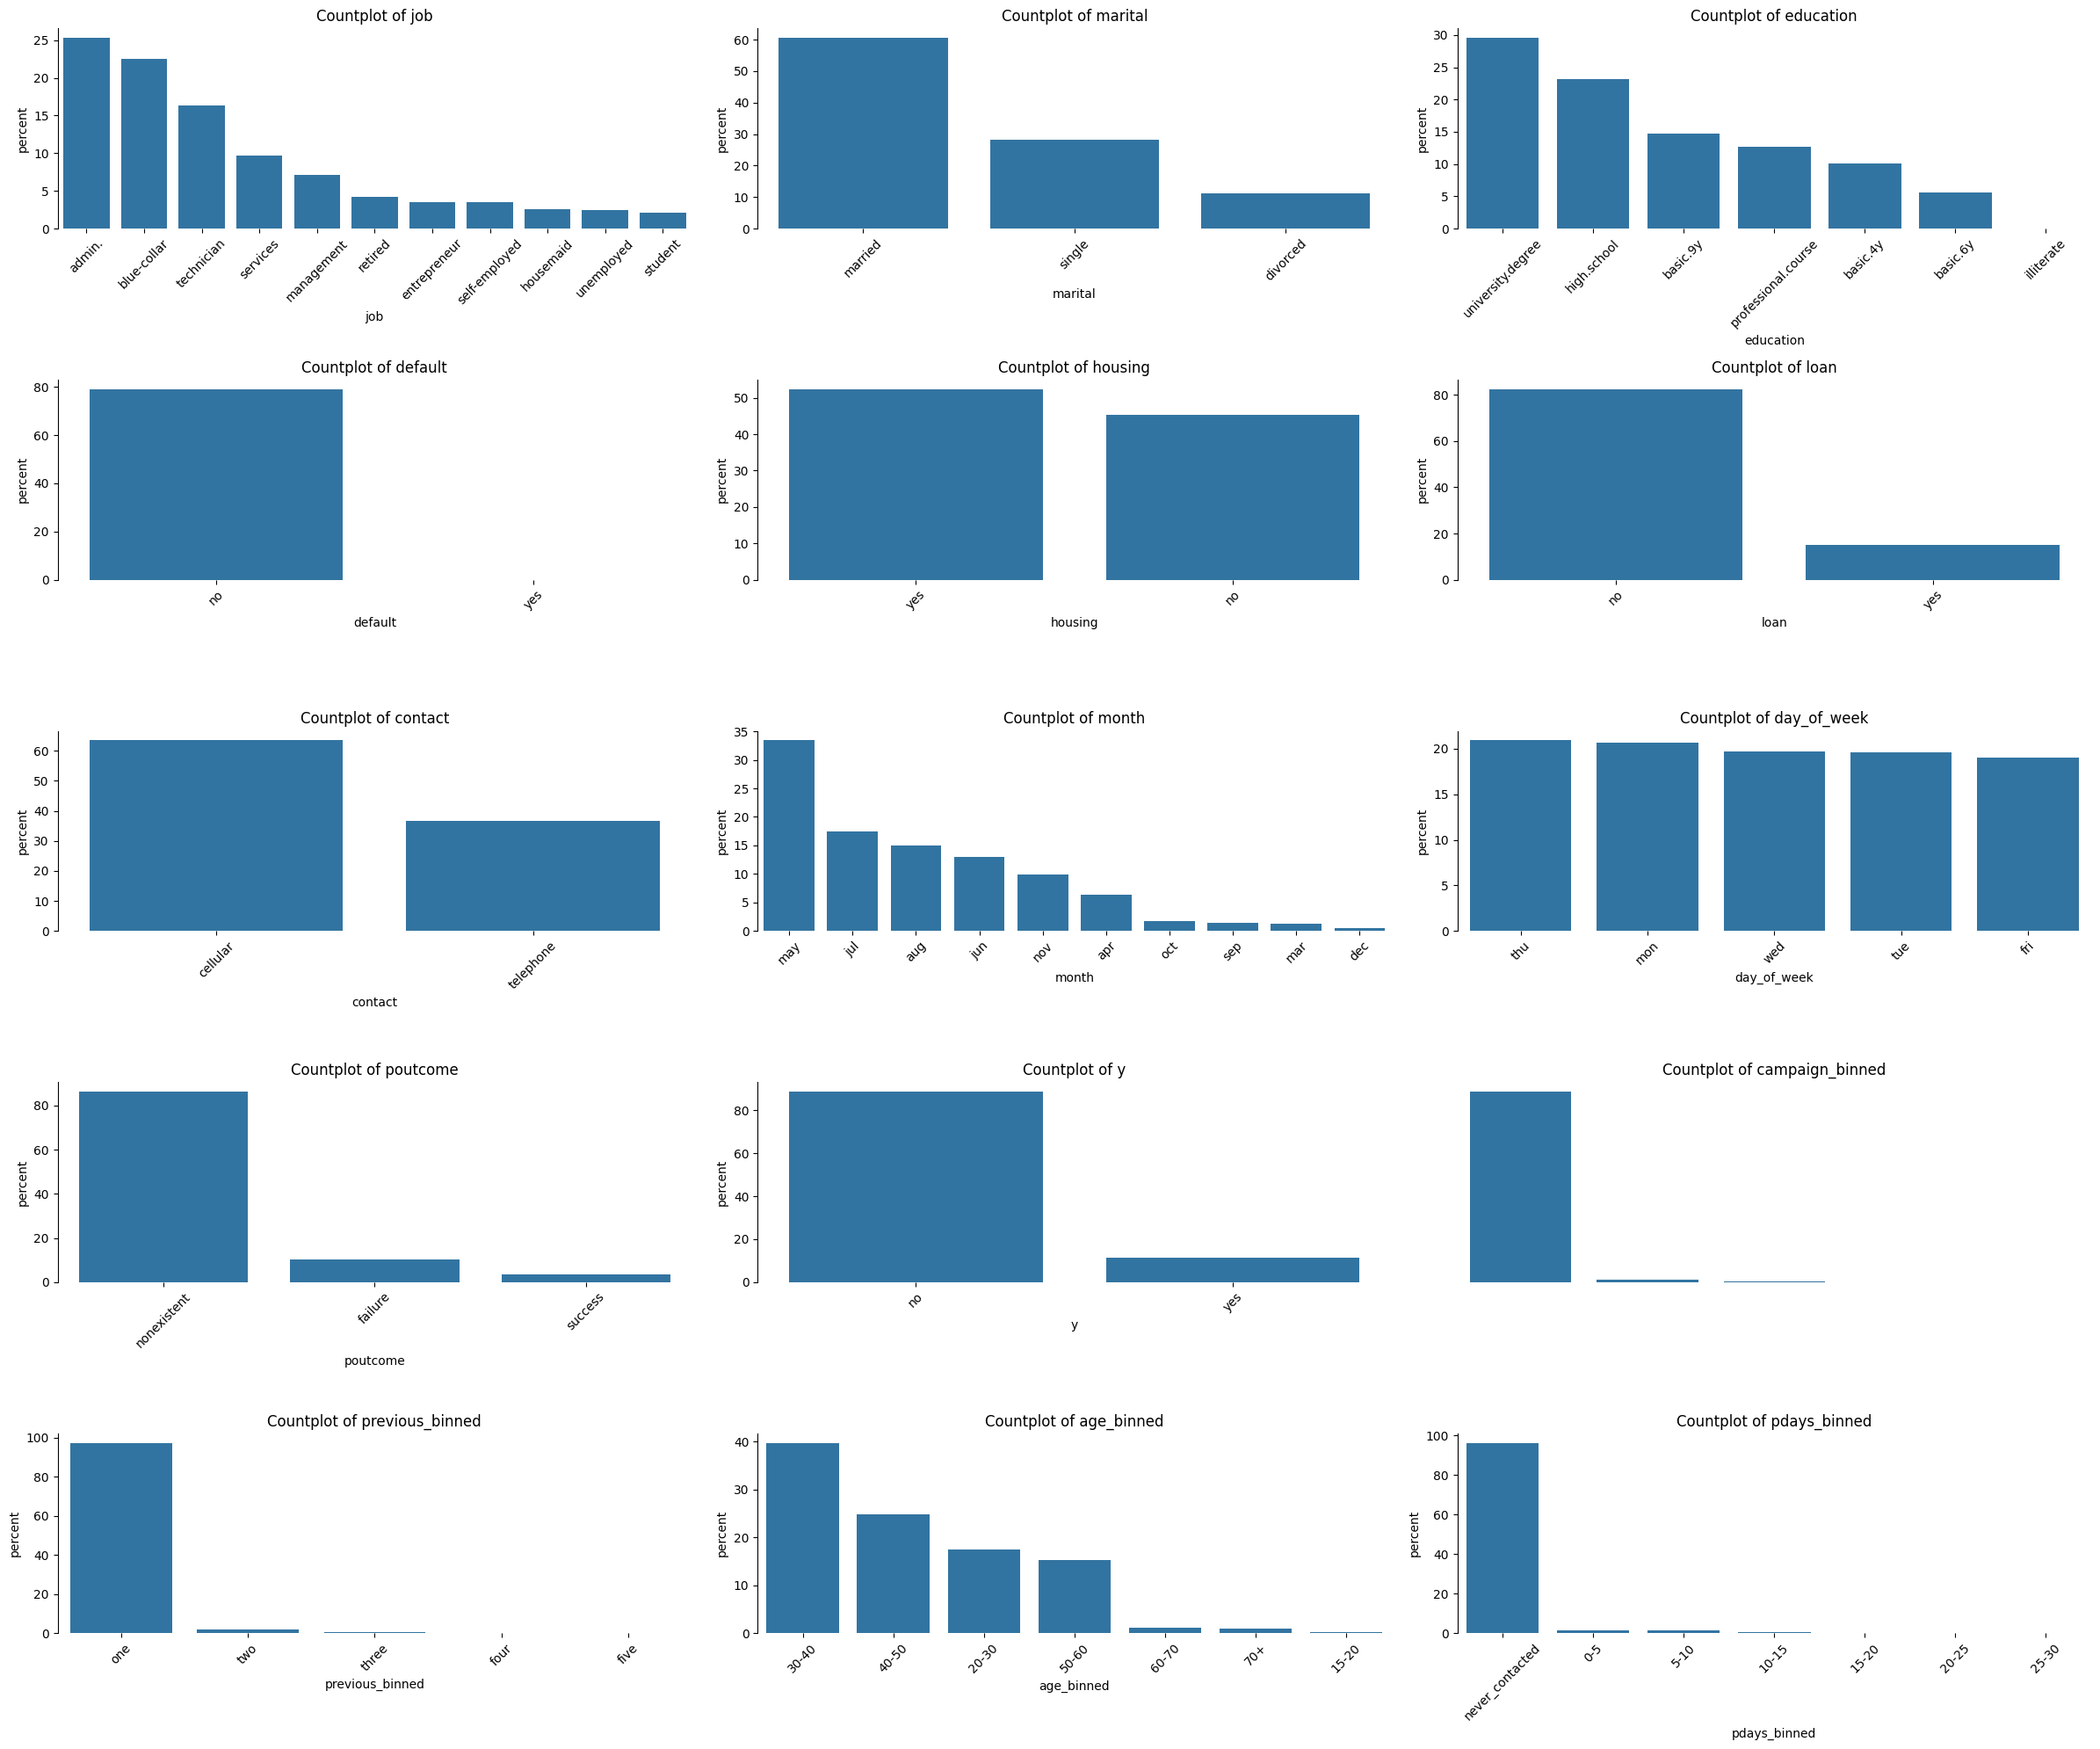

In [13]:
# CountPlot of Categorical Features with unknown values treated as NA

num_rows, num_cols = 5, 3

fig, axes = plt.subplots(num_rows, num_cols, 
                         figsize=(8*num_cols, 4*num_rows))
axes = axes.flatten()

for ax, feature in zip(axes, categorical_features):
    ordered = df[feature].value_counts().index.to_list()
    sns.countplot(data=df, 
                  x=feature, 
                  stat='percent',
                  order=ordered,
                  ax=ax,)
    
    ax.set_title(f'Countplot of {feature}')
    ax.tick_params(axis='x', rotation=45)

axes[11].axis('off')
sns.despine(left=False, right=True, top=True, bottom=True)
plt.tight_layout()
plt.show()

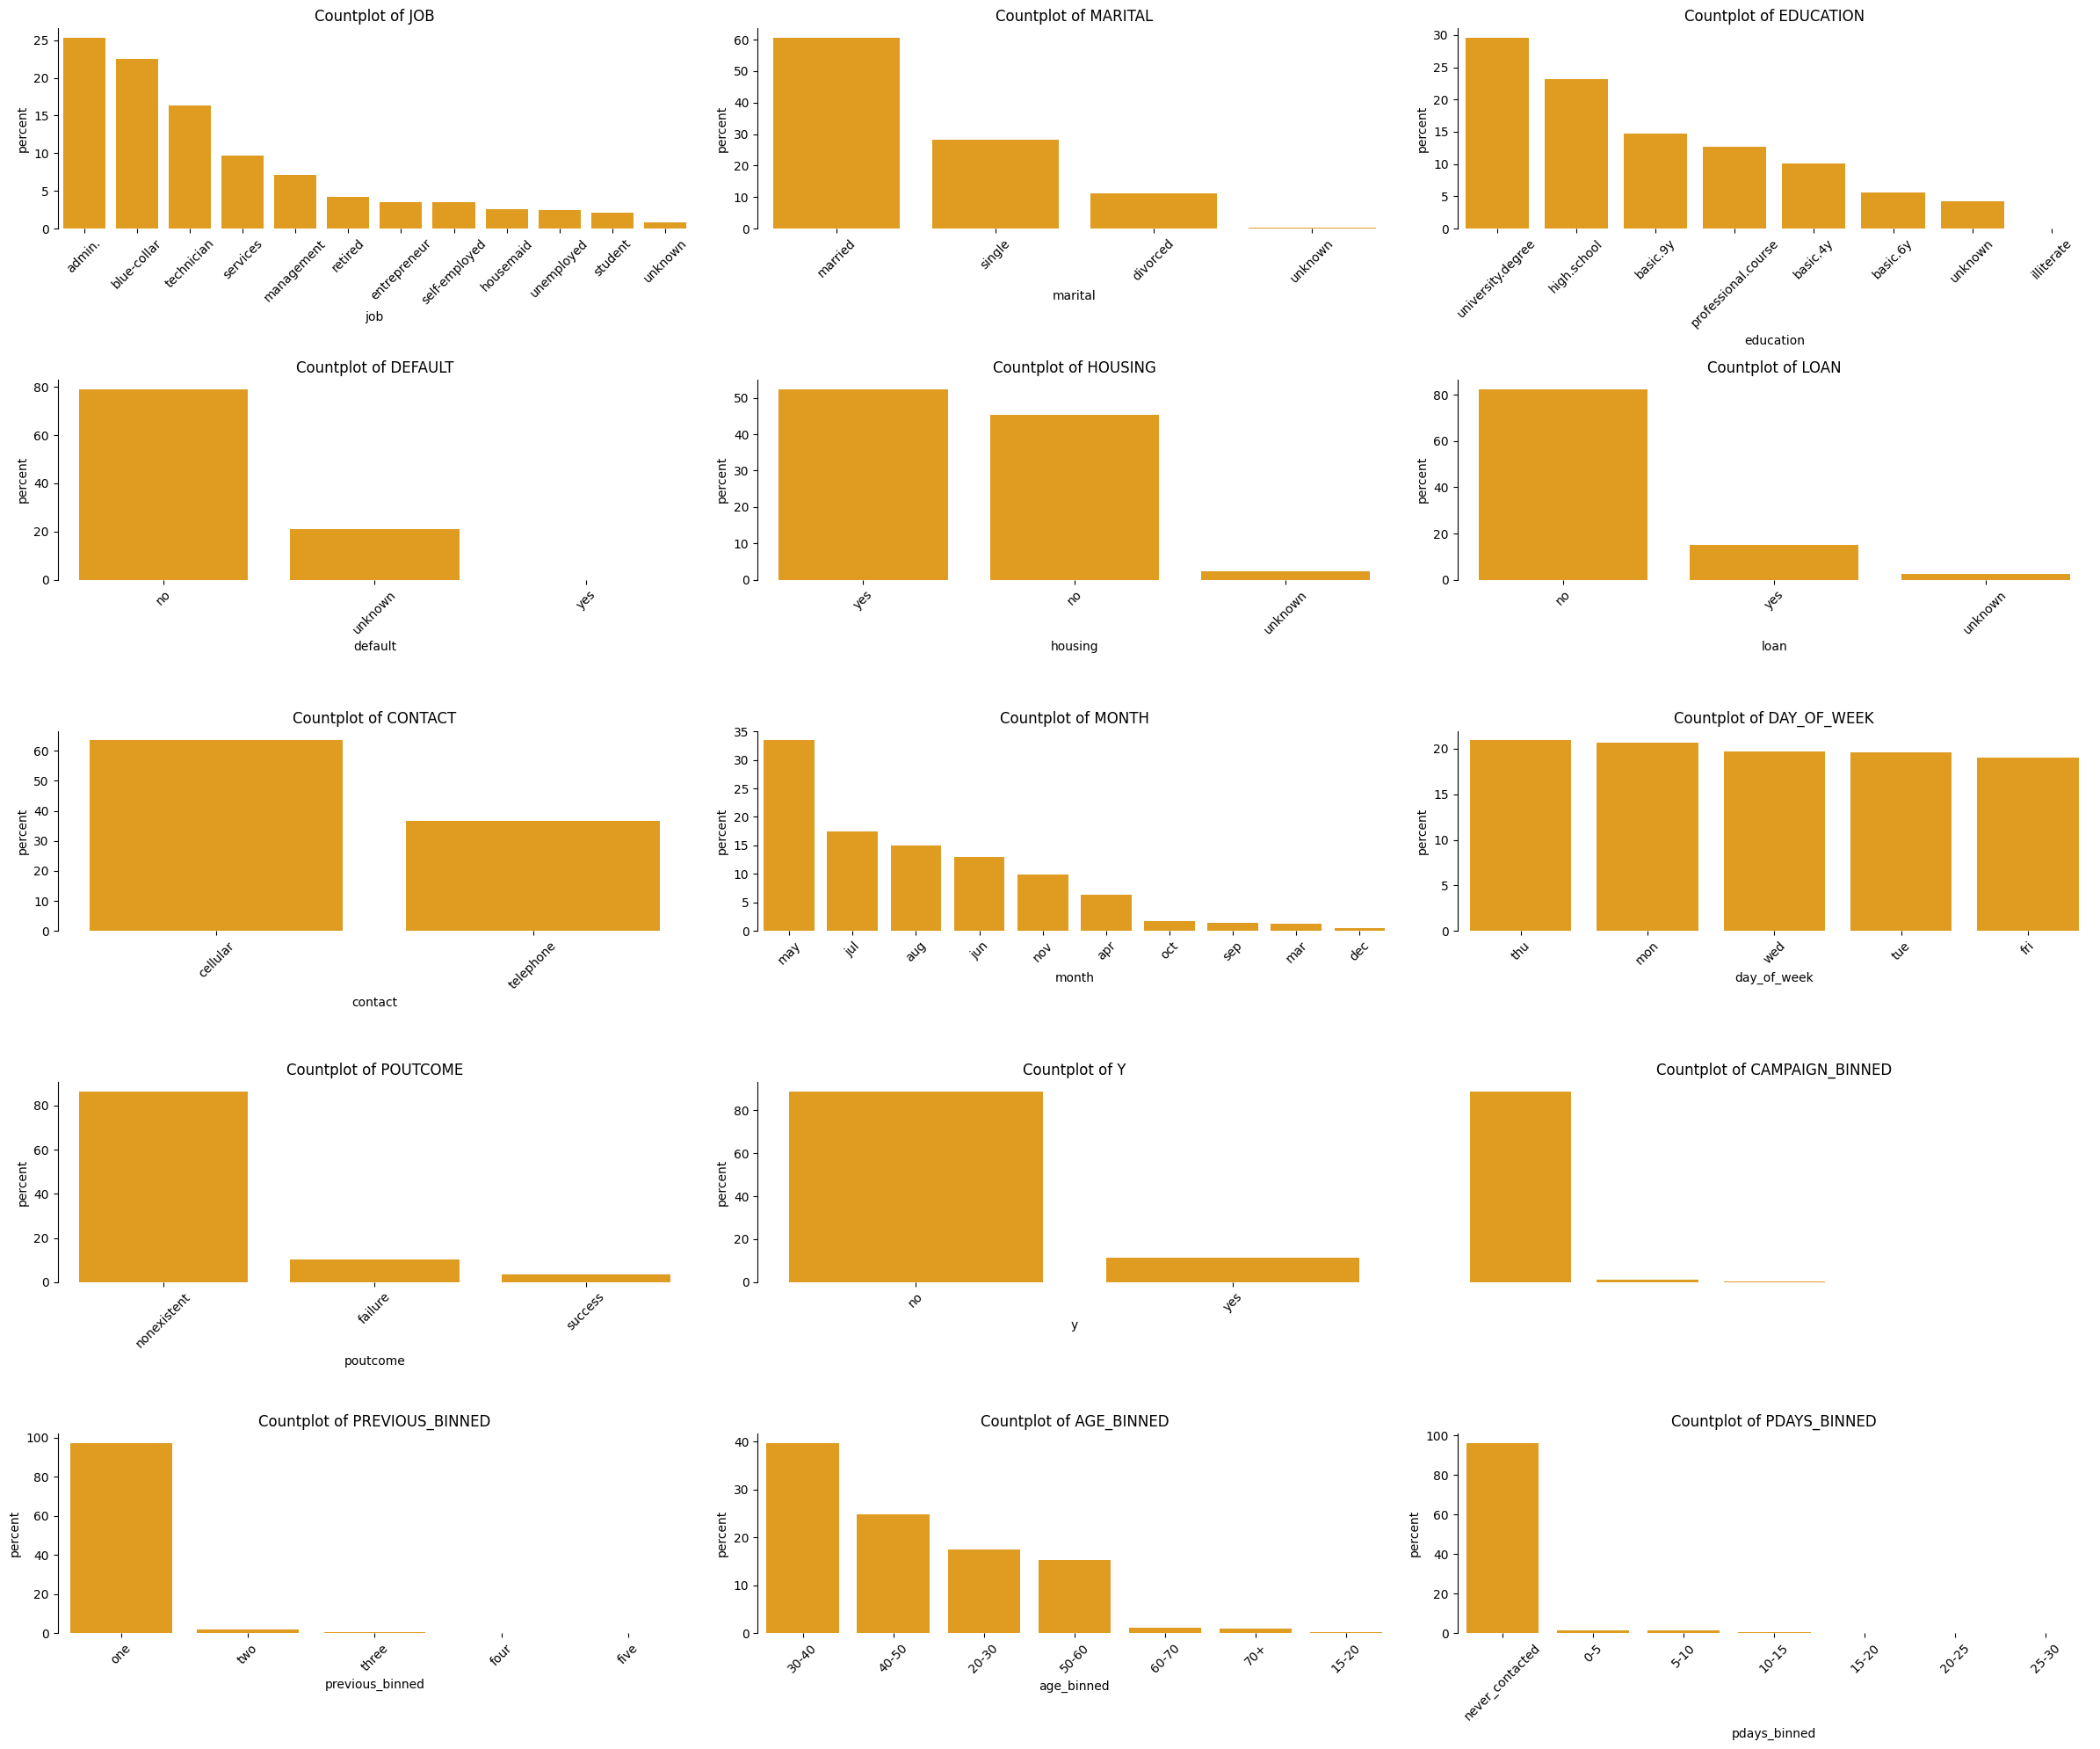

In [14]:
# Countplot of categorical features with unknown values as another level

num_rows, num_cols = 5, 3

fig, axes = plt.subplots(num_rows, num_cols, 
                         figsize=(8*num_cols, 4*num_rows))
axes = axes.flatten()

for ax, feature in zip(axes, categorical_features):
    ordered = data[feature].value_counts().index.to_list()
    sns.countplot(data=data, 
                  x=feature, 
                  stat='percent',
                  color='orange',
                  order=ordered,
                  ax=ax,)
    
    ax.set_title(f'Countplot of {feature.upper()}')
    ax.tick_params(axis='x', rotation=45)

axes[11].axis('off')
sns.despine(left=False, right=True, top=True, bottom=True)
plt.tight_layout()
plt.show()

#### Histplot and Boxplot for Continous variables

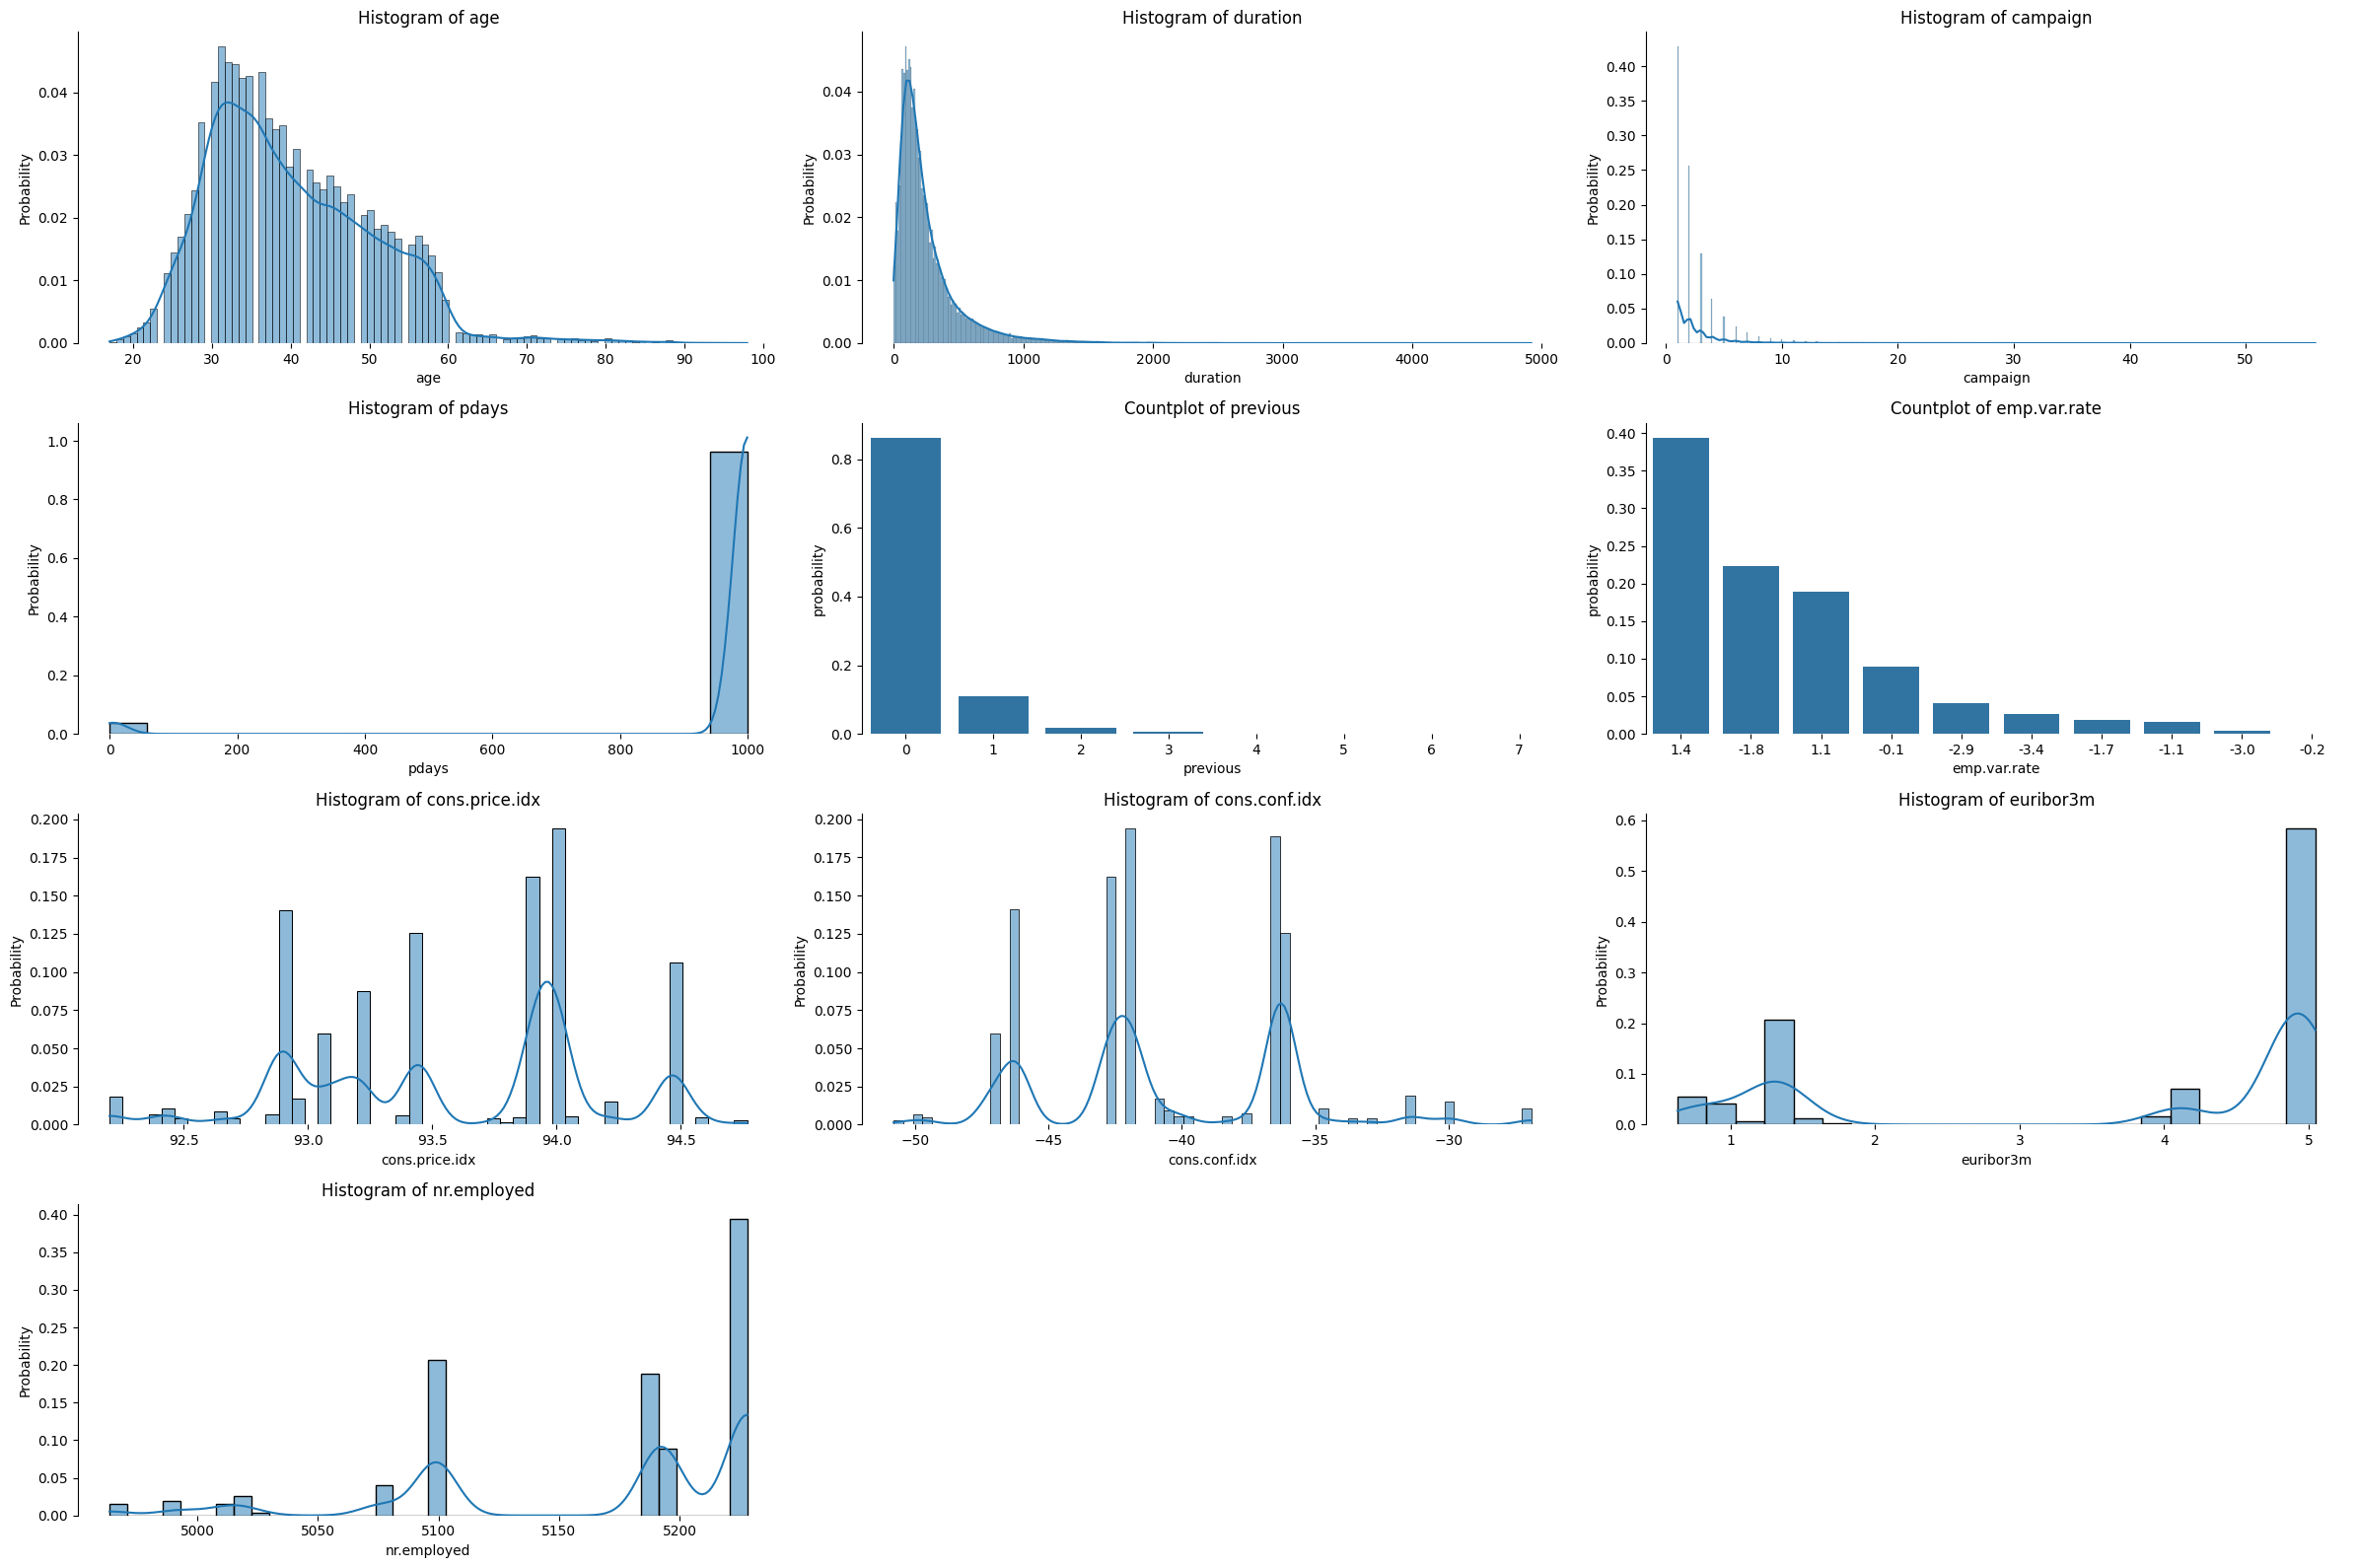

In [15]:
# Histograms

num_rows, num_cols = 4, 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8*num_cols, 4*num_rows))
axes = axes.flatten()

for ax, feature in zip(axes, continuous_features):
    # plot Histogram for features with number of unique data points greater than 10.
    if df[feature].nunique() > 10:
        sns.histplot(data=df,
                     x=feature,
                     kde=True,
                     stat='probability', 
                     ax=ax)
        ax.set_title(f'Histogram of {feature}')
    else:
        # plot Countplot for features with number of unique data points less than or equal to 10.
        # Order the bars in descending order
        ordered = df[feature].value_counts().index.to_list()
        sns.countplot(data=df,
                      x=feature,
                      stat='probability',
                      order=ordered,
                      ax=ax)
        ax.set_title(f'Countplot of {feature}')
    
axes[10].axis('off')
axes[11].axis('off')
sns.despine(left=False, right=True, top=True, bottom=True)
plt.tight_layout()
plt.show()

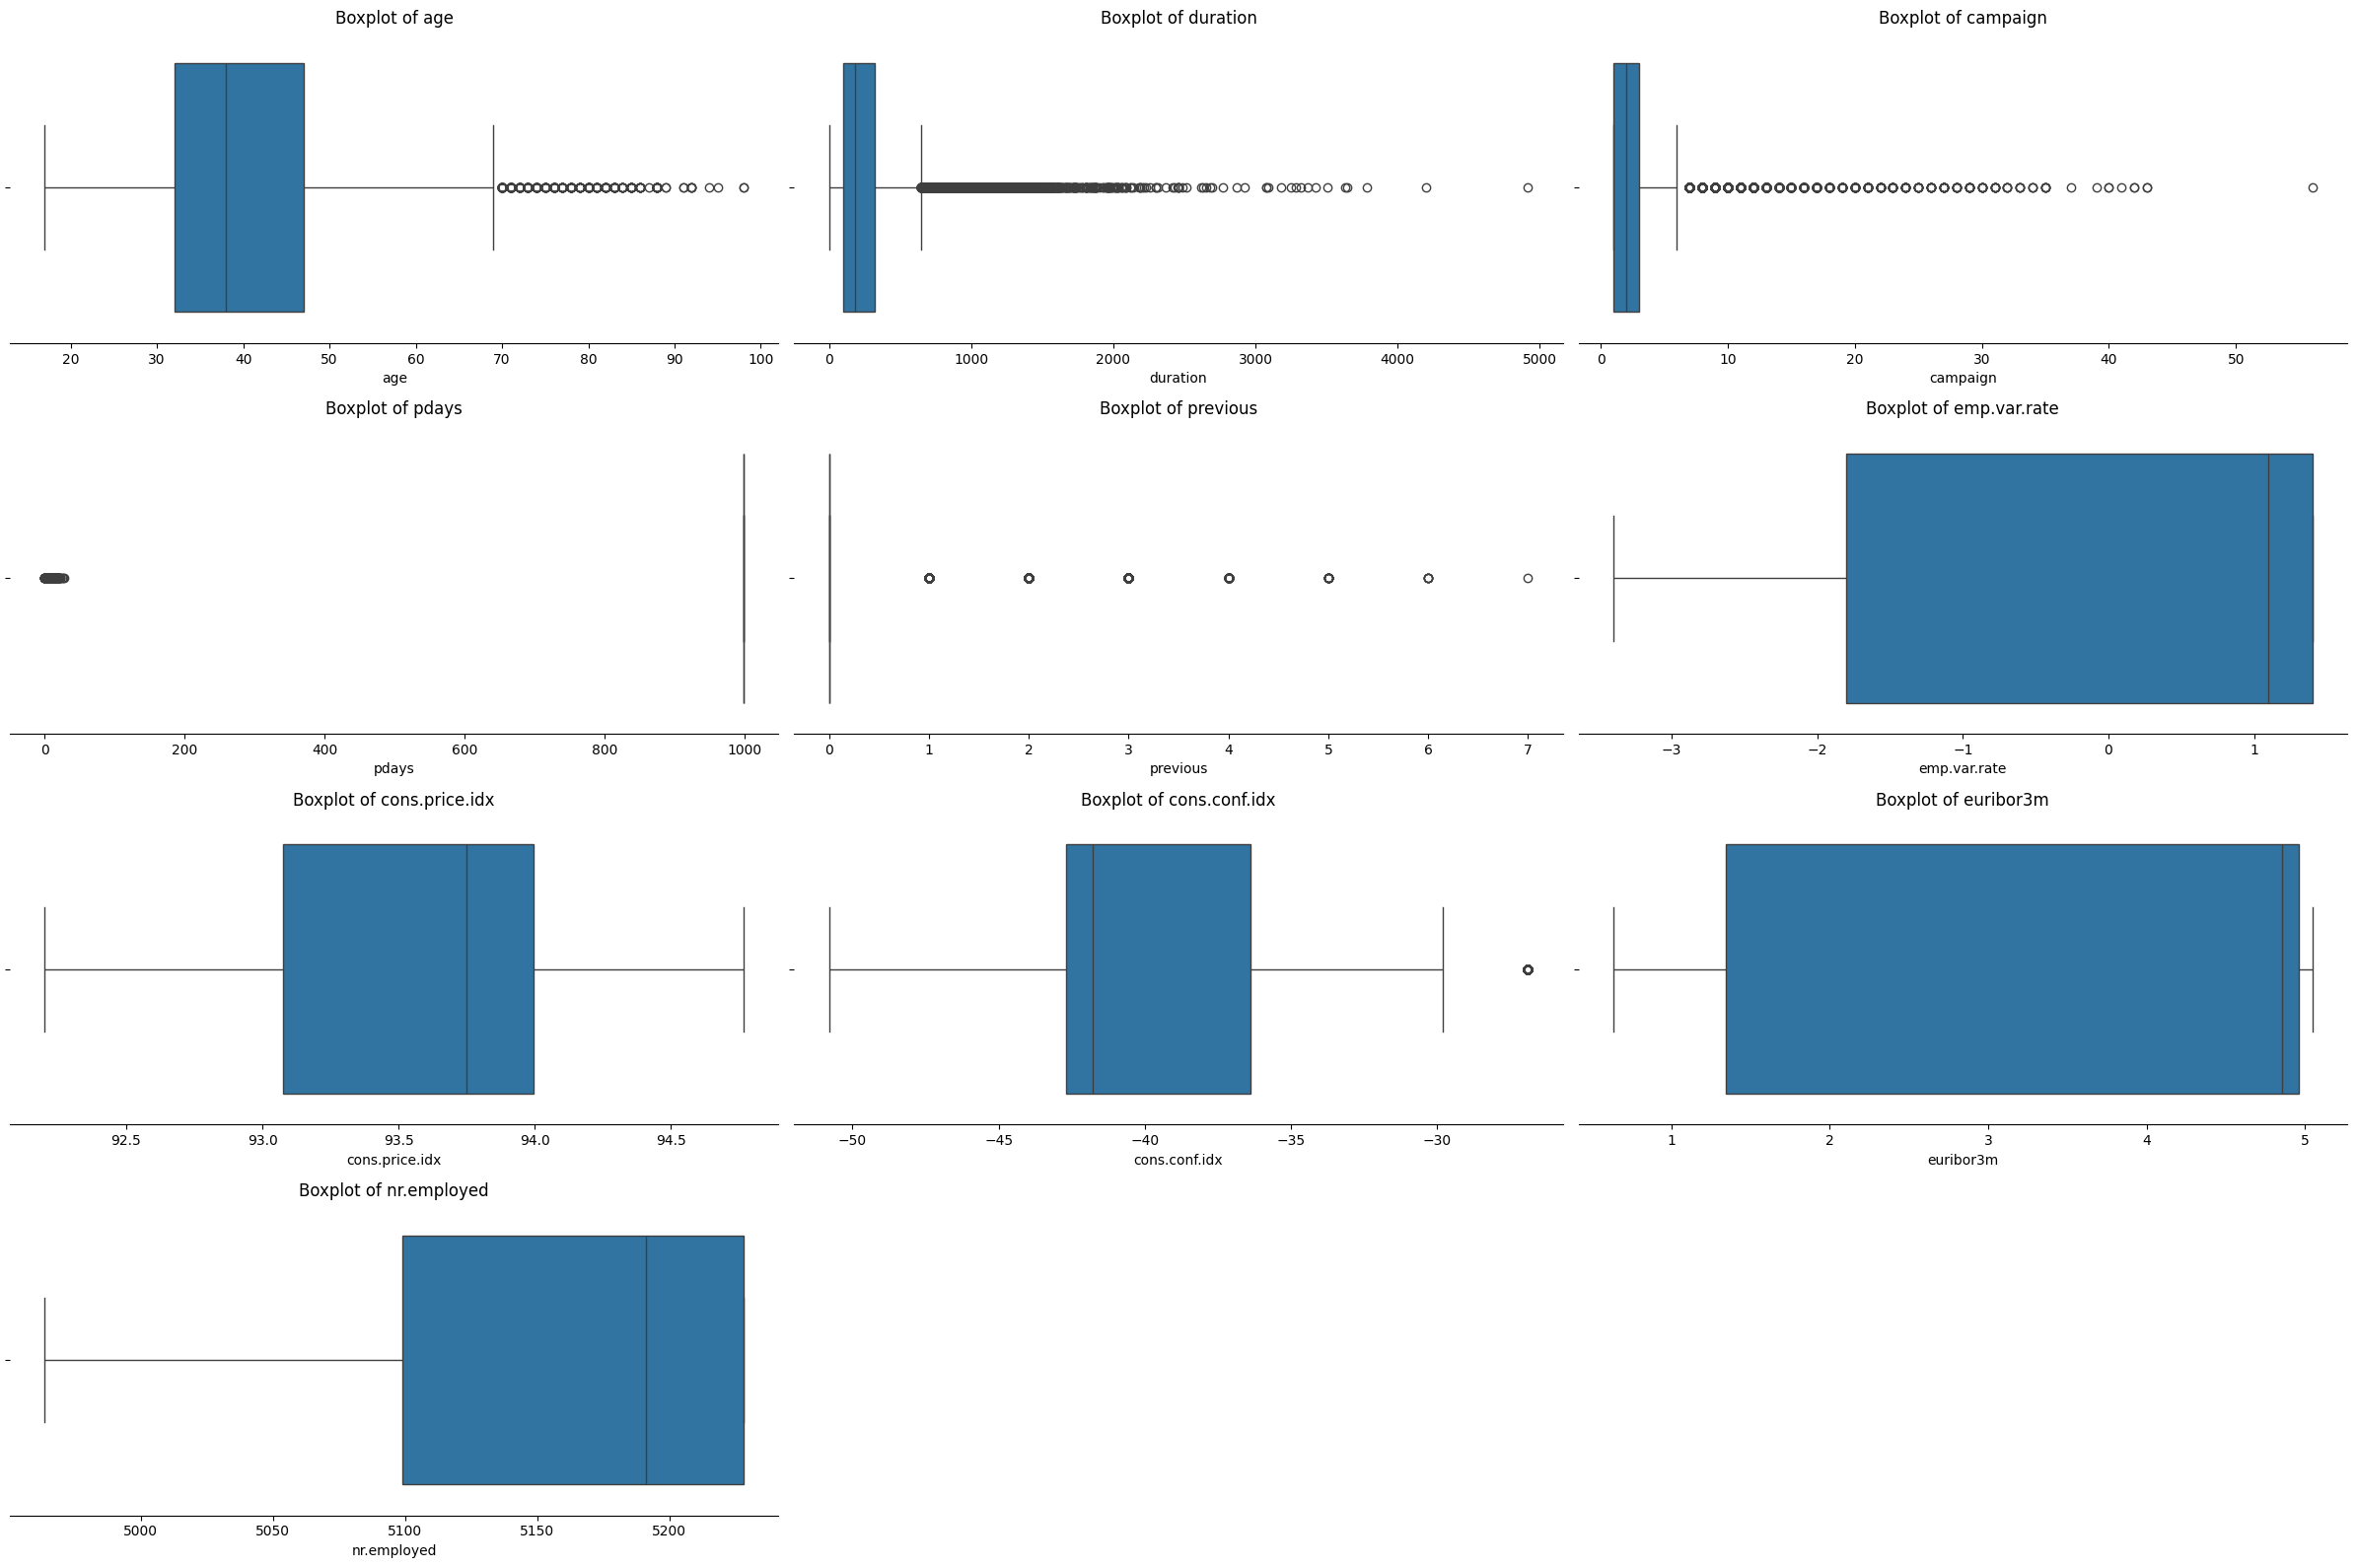

In [16]:
# Boxplot

num_rows, num_cols = 4, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8*num_cols, 4*num_rows))
axes = axes.flatten()

for ax, feature in zip(axes, continuous_features):
    sns.boxplot(data=df,
                x=feature,
                ax=ax)
    ax.set_title(f'Boxplot of {feature}')

axes[10].axis('off')
axes[11].axis('off')
sns.despine(left=True, right=True, top=True, bottom=False)
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Relationsship between categorical features

##### Small Multiple bar plot to visualize relationship between categorical variables

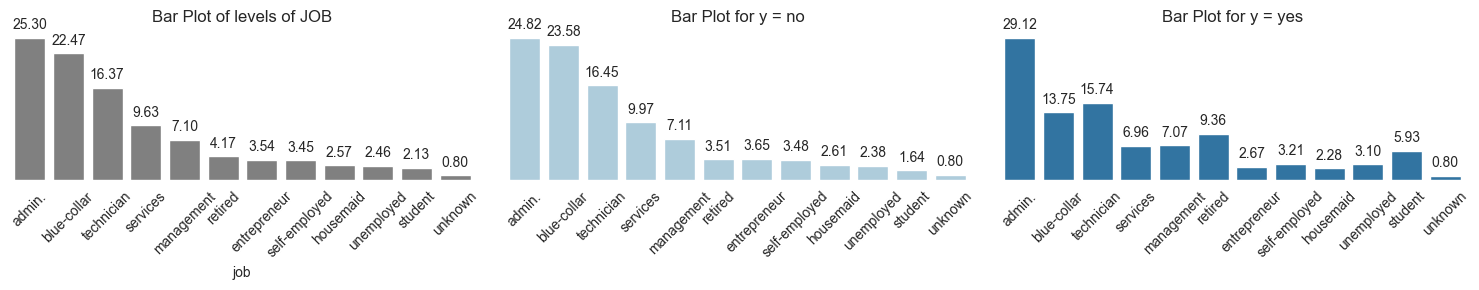

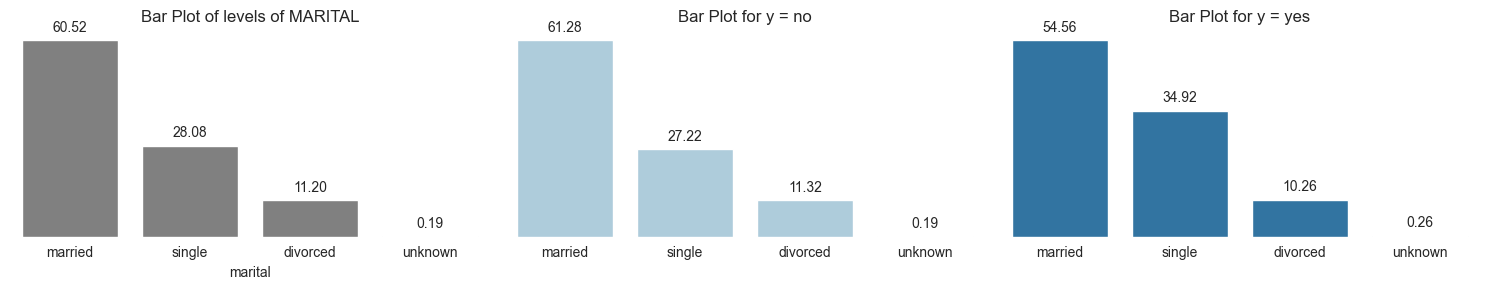

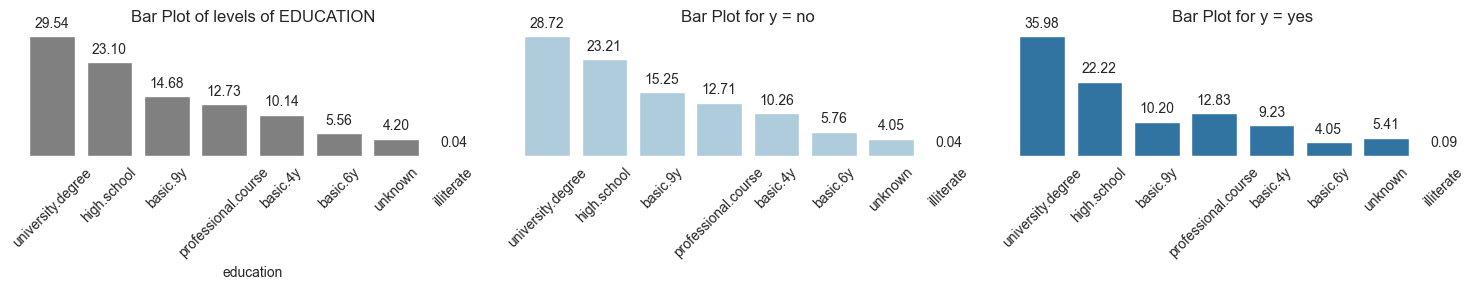

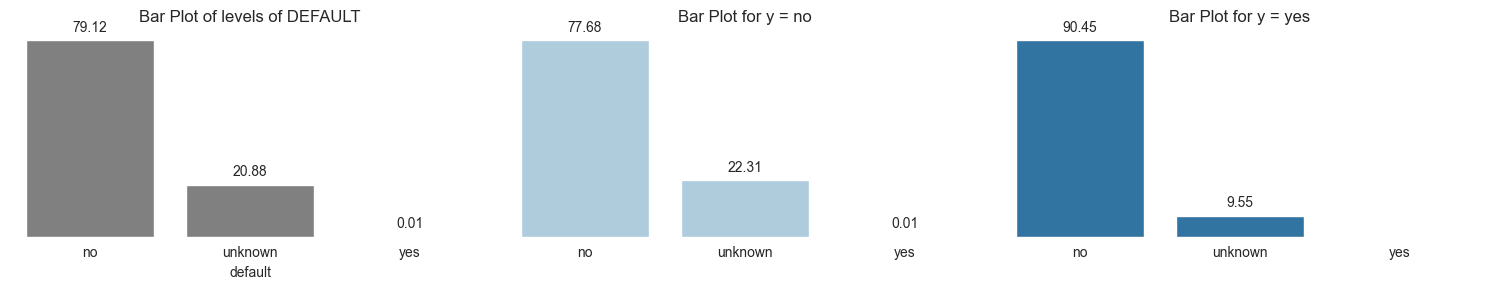

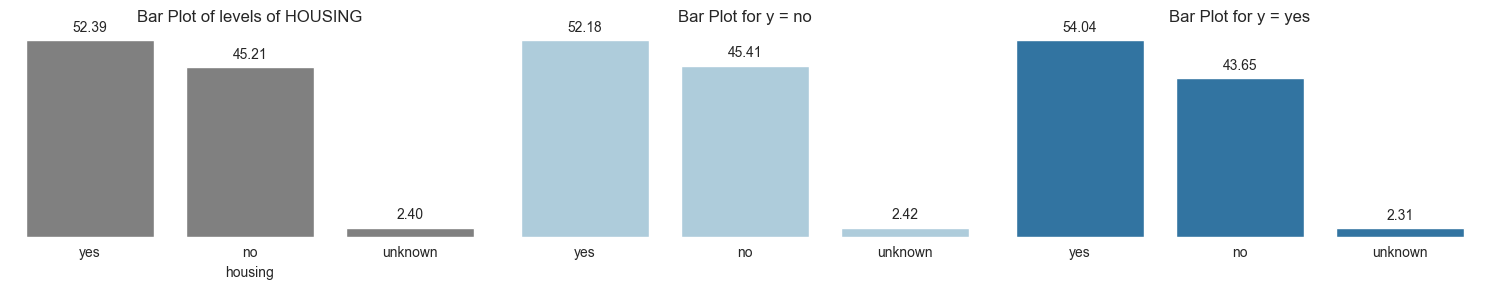

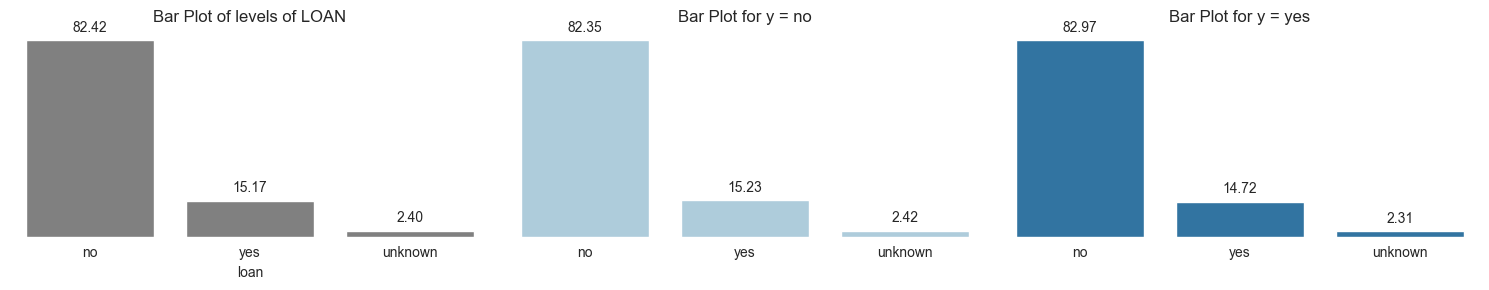

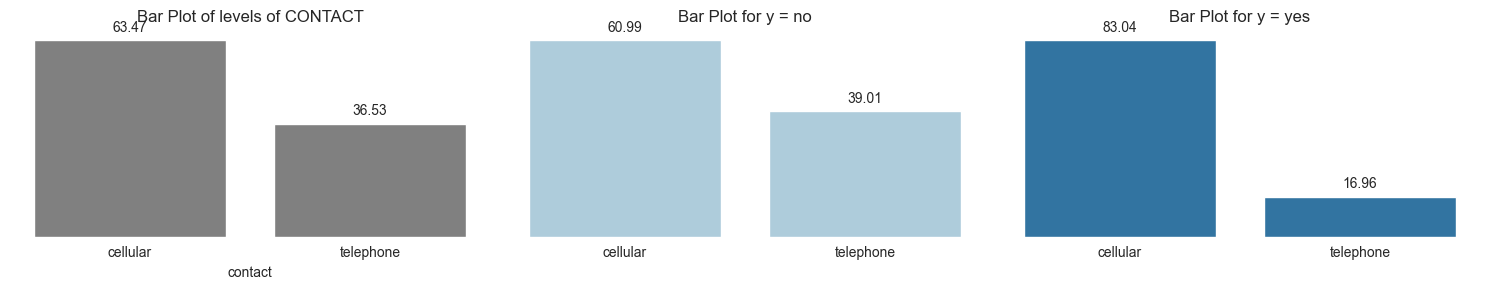

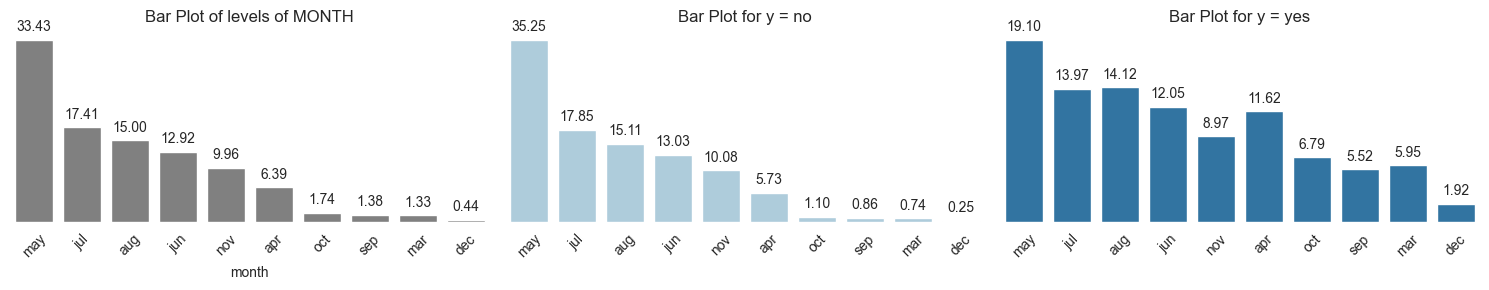

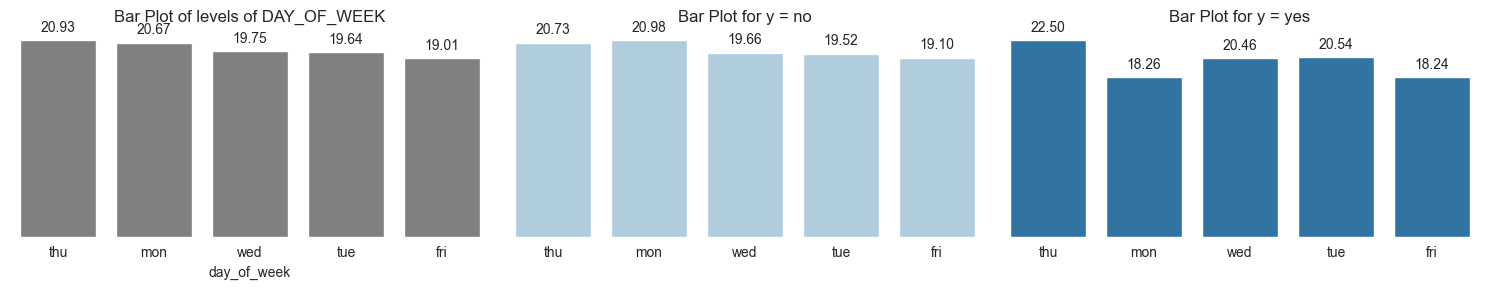

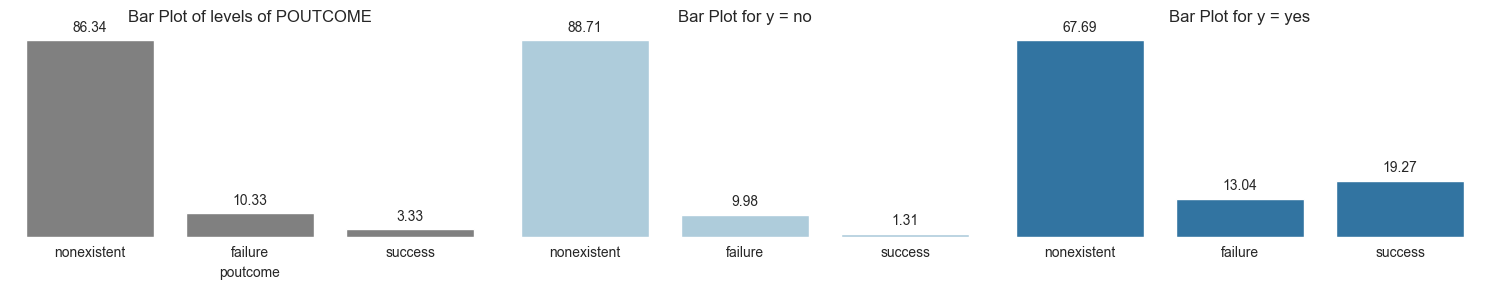

In [21]:
# Function to annotate the bars
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')
    ax.yaxis.set_visible(False)
    ax.set_ylabel('')
    ax.set_yticks([])


def small_multiple_bars(data, feature1, feature2):
    
    sns.set_style('white')
    
    # Create a list of unique categories in feature 2
    feature2_levels = data[feature2].unique()
    num_rows, num_cols = 1, len(feature2_levels) + 1
    fig, axes = plt.subplots(num_rows,
                             num_cols,
                             figsize=(5*num_cols, 3))
    
    axes = axes.flatten()

    # Draw a bar plot showing the probabilities of different levels of the feature 1.
    ordered = data[feature1].value_counts().index.to_list()
    sns.countplot(data=data,
                  x=feature1,
                  ax=axes[0],
                  color='gray',
                  stat='percent',
                  order=ordered)
    
    # Annotate bars of the first plot
    annotate_bars(axes[0])
    # Set title of first plot
    axes[0].set_title(f"Bar Plot of levels of {feature1.upper()}")
    # Rotate tick labels if number of level in a feature is more than 5
    if data[feature].nunique() > 5:
            axes[0].tick_params(axis='x', rotation=45)

    # List of colors to plot every figure with unique color
    colors = sns.color_palette("Paired")
    # For each level of the feature2, draw bar plots of feature1 using only
    # the instances where feature2 has that level.
    for level, color, ax in zip(feature2_levels, colors, axes[1:]):
        df = data[feature1][data[feature2] == level].value_counts()
        df_proportion = df / df.sum() * 100
        sns.barplot(df_proportion, ax=ax, color=color, order=ordered)
        
        # Annotate bars
        annotate_bars(ax)
        # Set the title of the individual plot
        ax.set_title(f"Bar Plot for {feature2} = {level}")
        # Rotate x tick labels if number of level in a feature is more than 5
        if data[feature1].nunique() > 5:
            ax.tick_params(axis='x', rotation=45)
    
    sns.despine(left=True, right=True, top=True, bottom=True)
    plt.tight_layout()
    plt.show()

# Plot small maltiple bar plot for each categorical feature with respect to the level of y
feature2 = 'y'
for feature in categorical_features:
    if feature != feature2:
        small_multiple_bars(data=data,
                            feature1=feature,
                            feature2=feature2)

##### Correlation between categorical variables

In [12]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'campaign_binned',
       'previous_binned', 'age_binned', 'pdays_binned'],
      dtype='object')

In [10]:
def categorical_levels_corr(data, feature1, feature2, threshold=1.25):
    """
    Calculate the relationship between levels of two categorical features.
    
    Parameters:
        data (pd.DataFrame): The dataset containing the features.
        feature1 (str): The first categorical feature.
        feature2 (str): The second categorical feature.
        threshold (float): The threshold to determine significant relationships.
        
    Returns:
        dict: A dictionary where keys are levels of feature2 and values are dictionaries of levels of feature1 with their ratio values.
    """
    # Create cross-tabulation of the two features with margins
    crosstab = pd.crosstab(data[feature1], data[feature2], margins=True, normalize='all')
    
    # Extract the overall ratios
    overall_ratios = crosstab.loc['All'].drop('All')
    
    # Normalize the crosstab to calculate ratios excluding the 'All' column
    crosstab_ratio = crosstab.div(crosstab['All'], axis=0).drop(columns='All').drop(index='All')
    
    # Calculate the rank by comparing each level ratio to the overall ratio
    rank = crosstab_ratio.div(overall_ratios)
    
    # Filter levels where the rank exceeds the threshold and store their rank values
    level_series_dict = {col: rank[col][rank[col] > threshold].round(2).to_dict() for col in rank.columns}
    
    return level_series_dict


# Define feature2 and the threshold
feature2 = 'month'
threshold = 3.99

# Loop through each categorical feature
for feature in categorical_features:
    if feature != feature2:
        # Call the function to get the dictionary of strong relationships
        strong_relationships = categorical_levels_corr(df, feature, feature2, threshold)
        
        # Check if there are any strong relationships
        if any(strong_relationships.values()):
            # Print the header for each categorical feature pair
            print(f'There is a strong relationship between the following categories '
                  f'in the {feature.title()} and {feature2.title()}:')
            
            # Print out the relationships
            index = 1
            for key, value in strong_relationships.items():
                if value:
                    for level, rank in value.items():
                        print(f'{index:2d}. {level.title()} ({feature.title()}) & '
                              f'{key.title()} ({feature2.title()}): {rank}')
                        index += 1
            
            # Print a blank line after processing each column
            print()

There is a strong relationship between the following categories in the Job and Age_Binned:
 1. Student (Job) & 15-20 (Age_Binned): 40.67
 2. Student (Job) & 20-30 (Age_Binned): 4.0
 3. Retired (Job) & 60-70 (Age_Binned): 14.54
 4. Retired (Job) & 70+ (Age_Binned): 21.69

There is a strong relationship between the following categories in the Education and Age_Binned:
 1. Unknown (Education) & 15-20 (Age_Binned): 7.99
 2. Basic.4Y (Education) & 70+ (Age_Binned): 5.01
 3. Illiterate (Education) & 70+ (Age_Binned): 5.43

There is a strong relationship between the following categories in the Month and Age_Binned:
 1. Dec (Month) & 15-20 (Age_Binned): 6.46
 2. Sep (Month) & 15-20 (Age_Binned): 5.16
 3. Dec (Month) & 60-70 (Age_Binned): 10.2
 4. Mar (Month) & 60-70 (Age_Binned): 5.87
 5. Oct (Month) & 60-70 (Age_Binned): 8.59
 6. Sep (Month) & 60-70 (Age_Binned): 7.4
 7. Dec (Month) & 70+ (Age_Binned): 10.21
 8. Mar (Month) & 70+ (Age_Binned): 6.45
 9. Oct (Month) & 70+ (Age_Binned): 8.59
10.

#### Relationship between numerical features

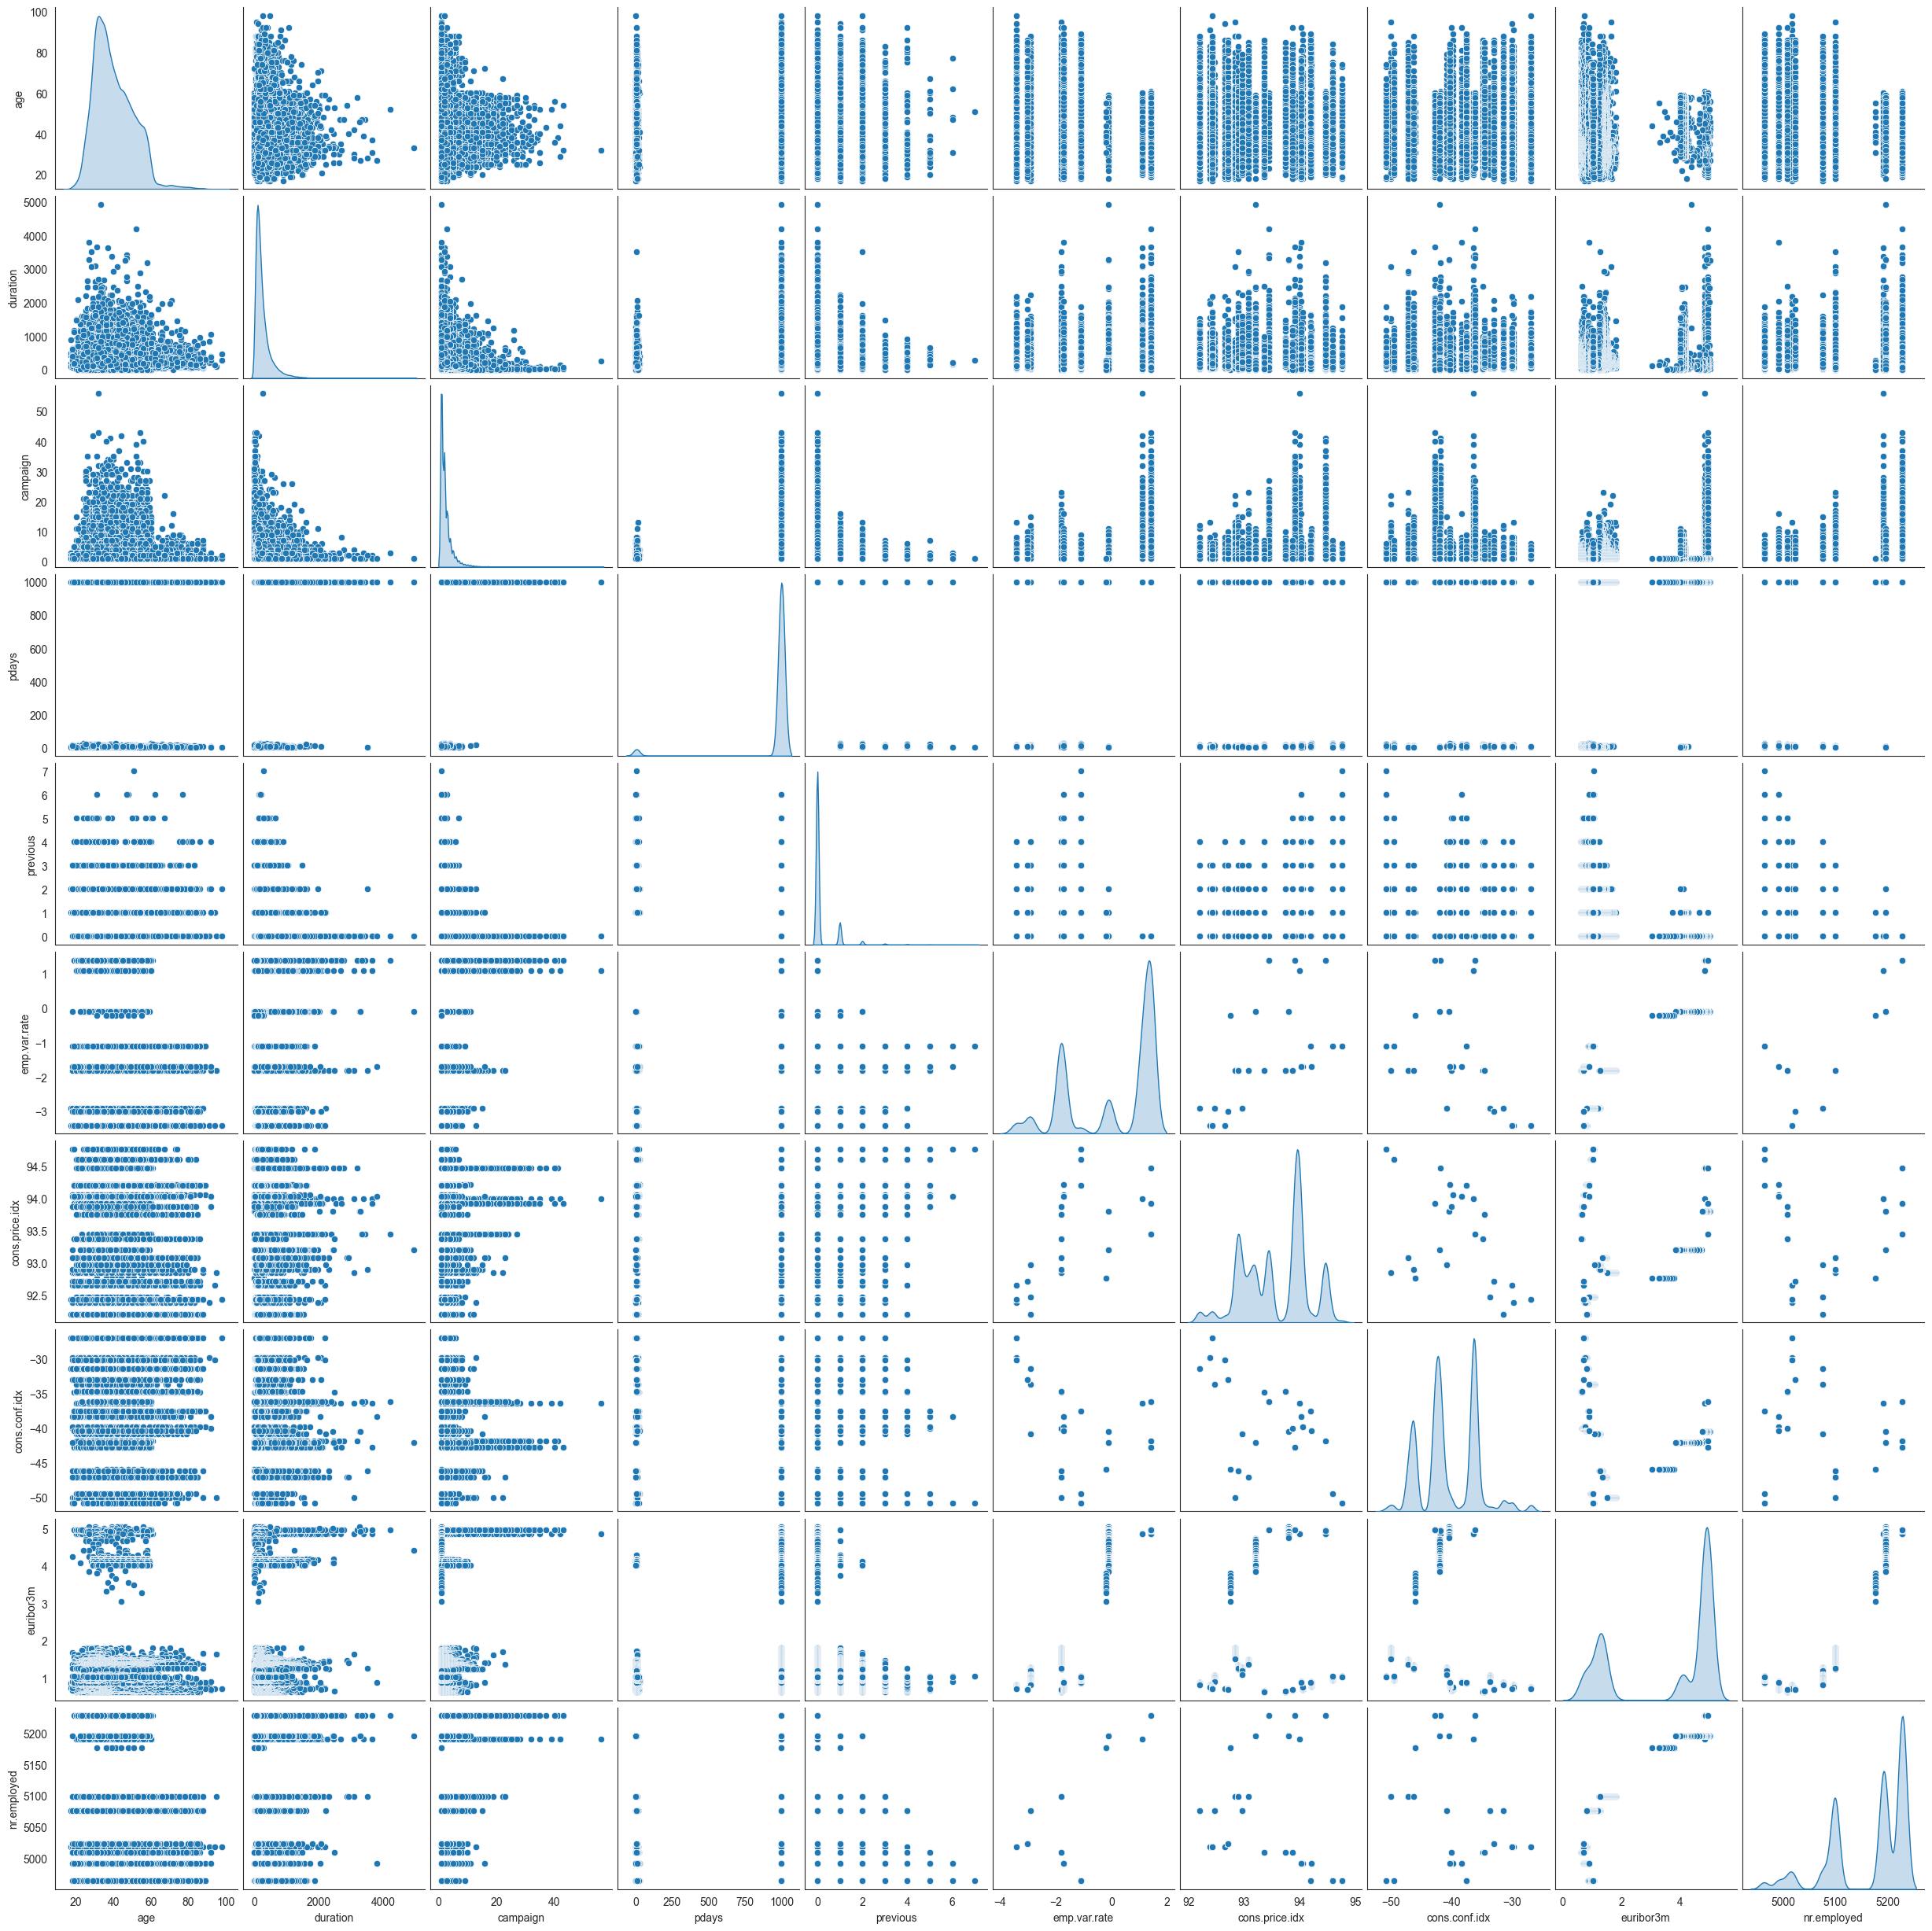

In [69]:
# plot Pairplot
sns.pairplot(data=data, diag_kind='kde');

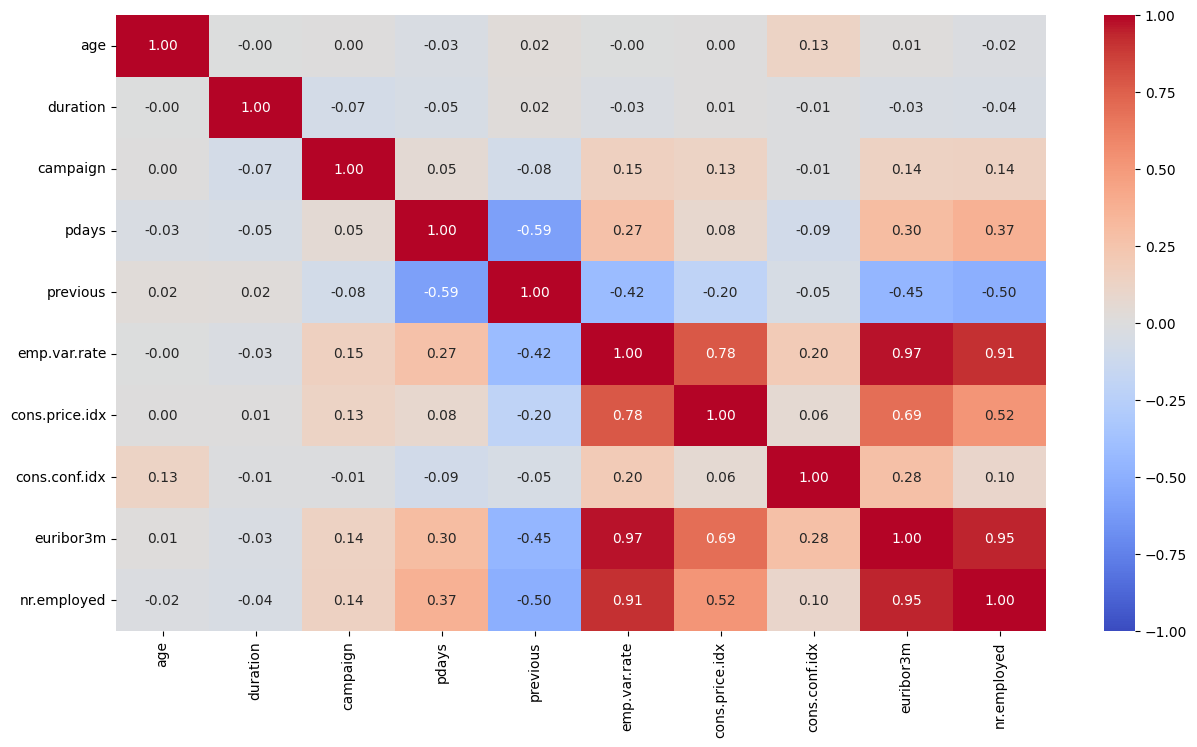

In [51]:
# plot Correlation Matrix
corr_matrix = data[continuous_features].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1);

Numerical features with high correlation:
- emp.var.rate & cons.price.idx (0.78)
- emp.var.rate & euribor3m (0.97)
- emp.var.rate & nr.employed (0.91)
- cos.price.idx & euribor3m (0.69)
- cos.price.idx & nr.employed (0.52)
- euribor3m & nr.employed (0.95)

#### Relationship between numerical and categorical features

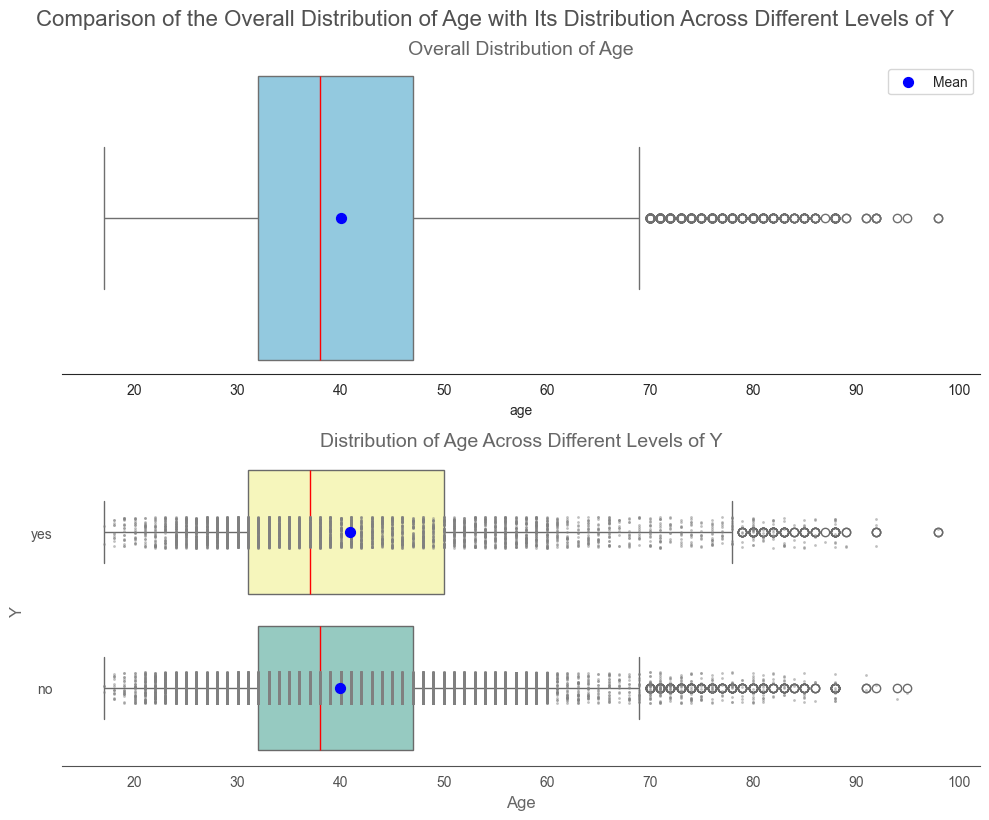

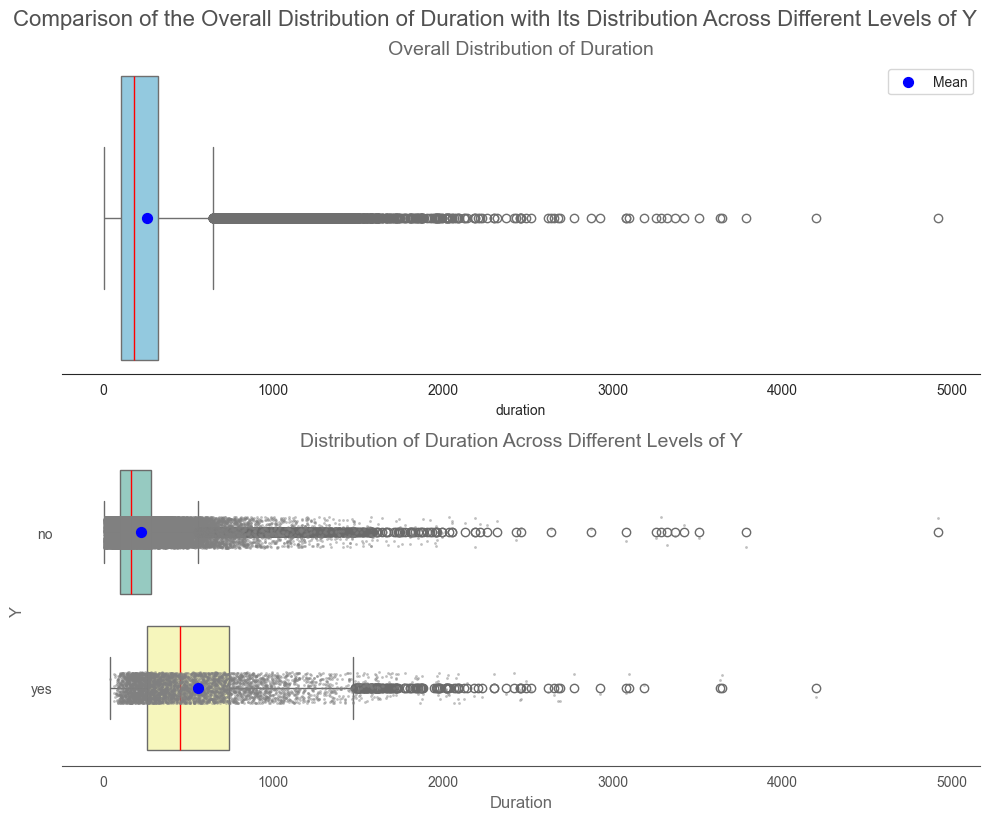

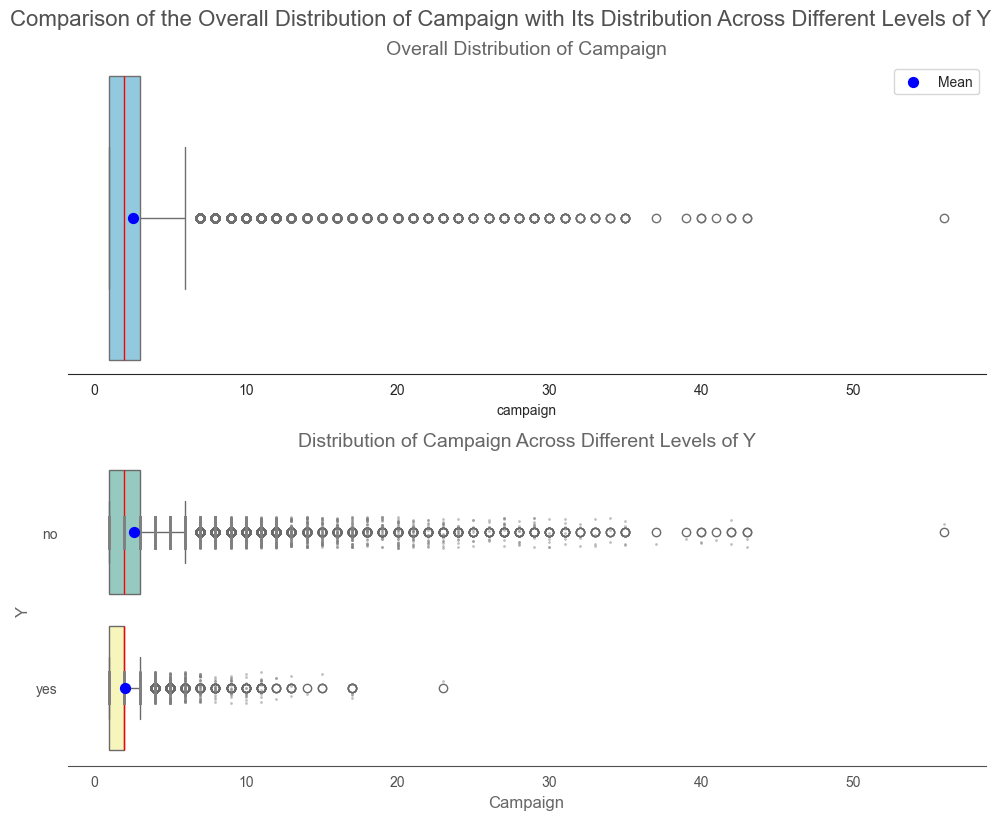

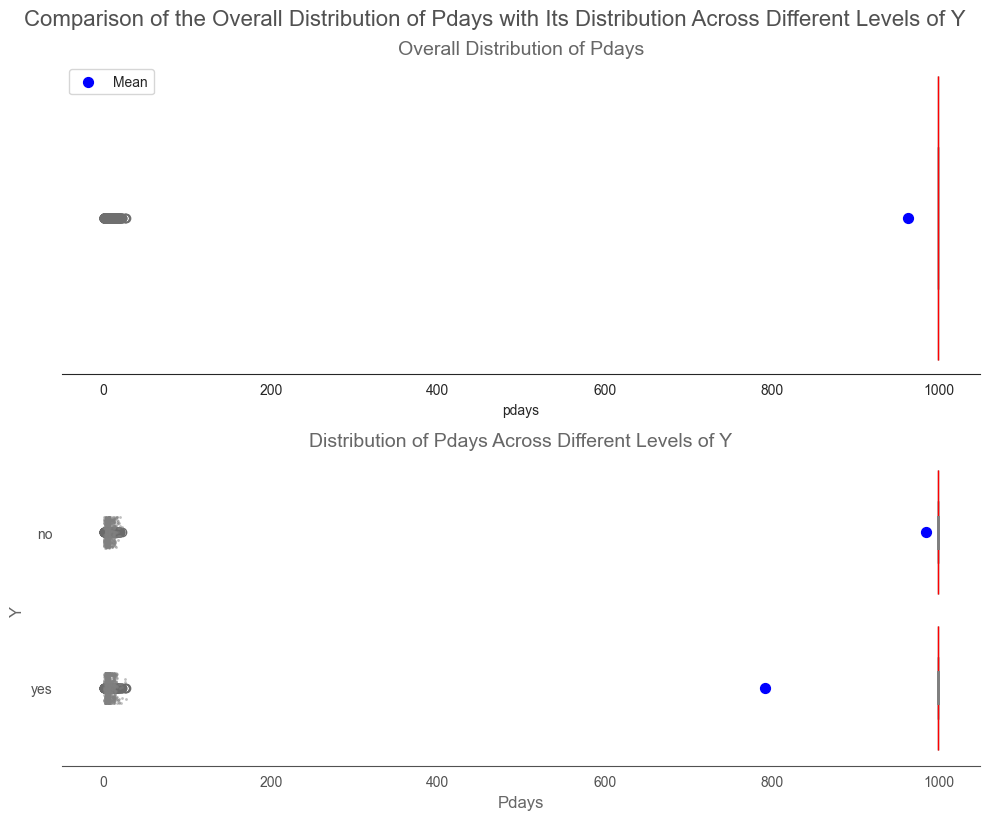

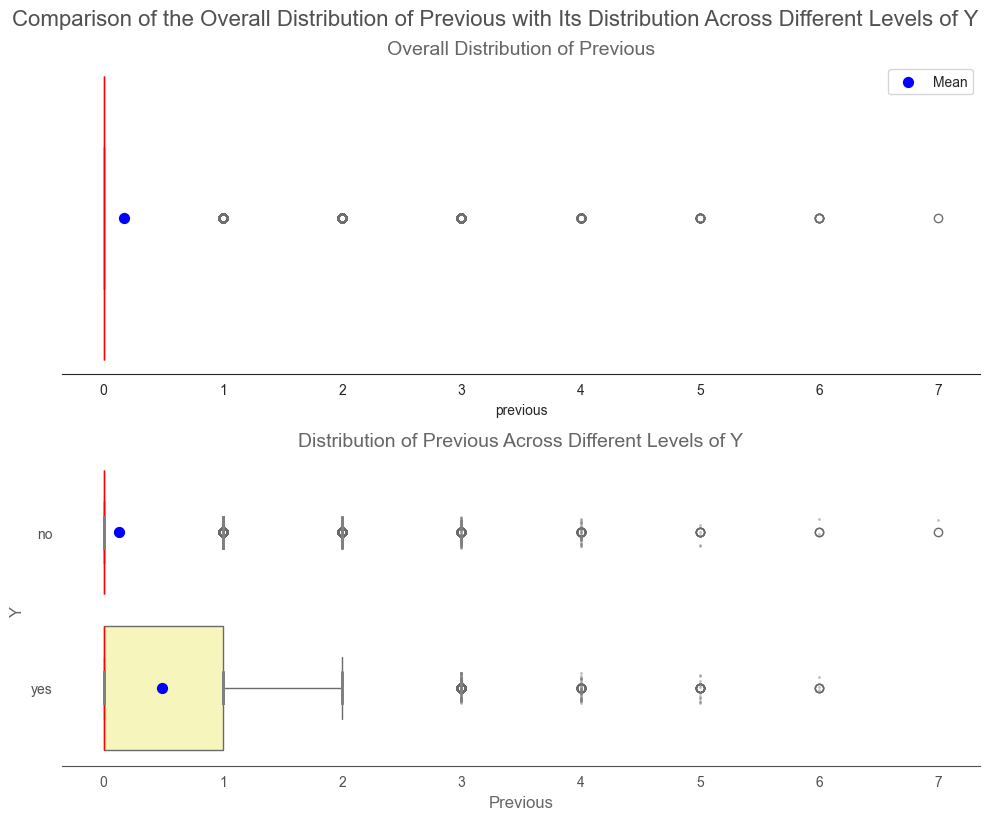

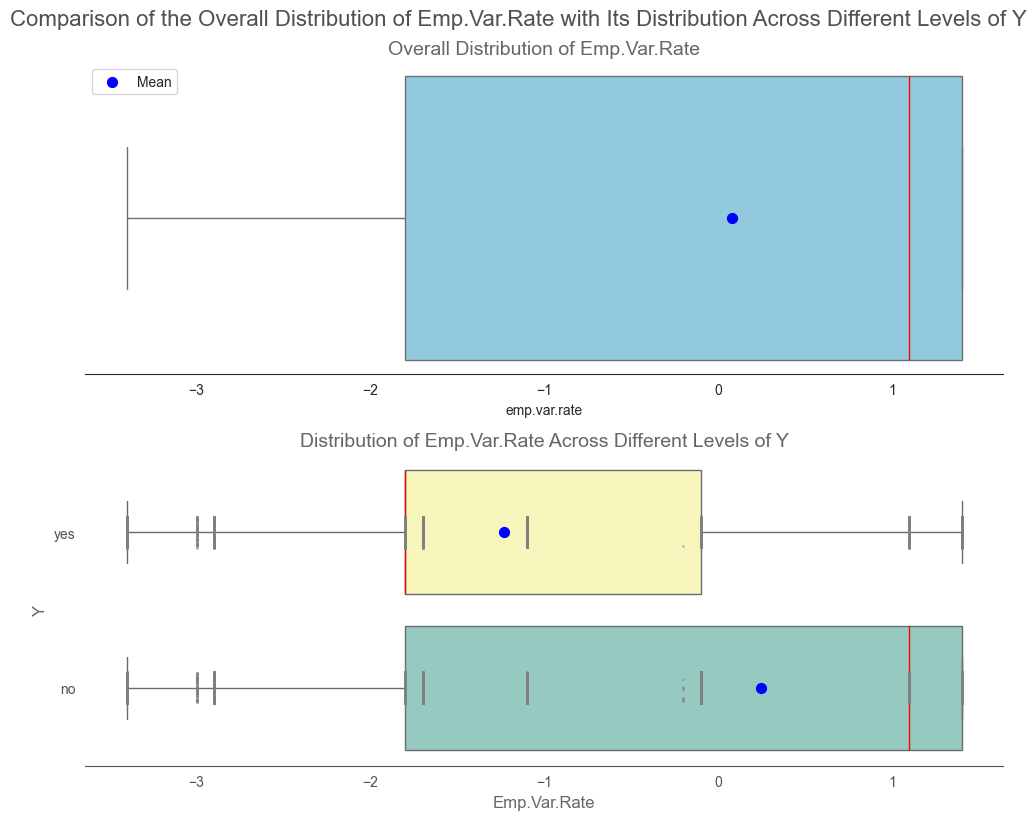

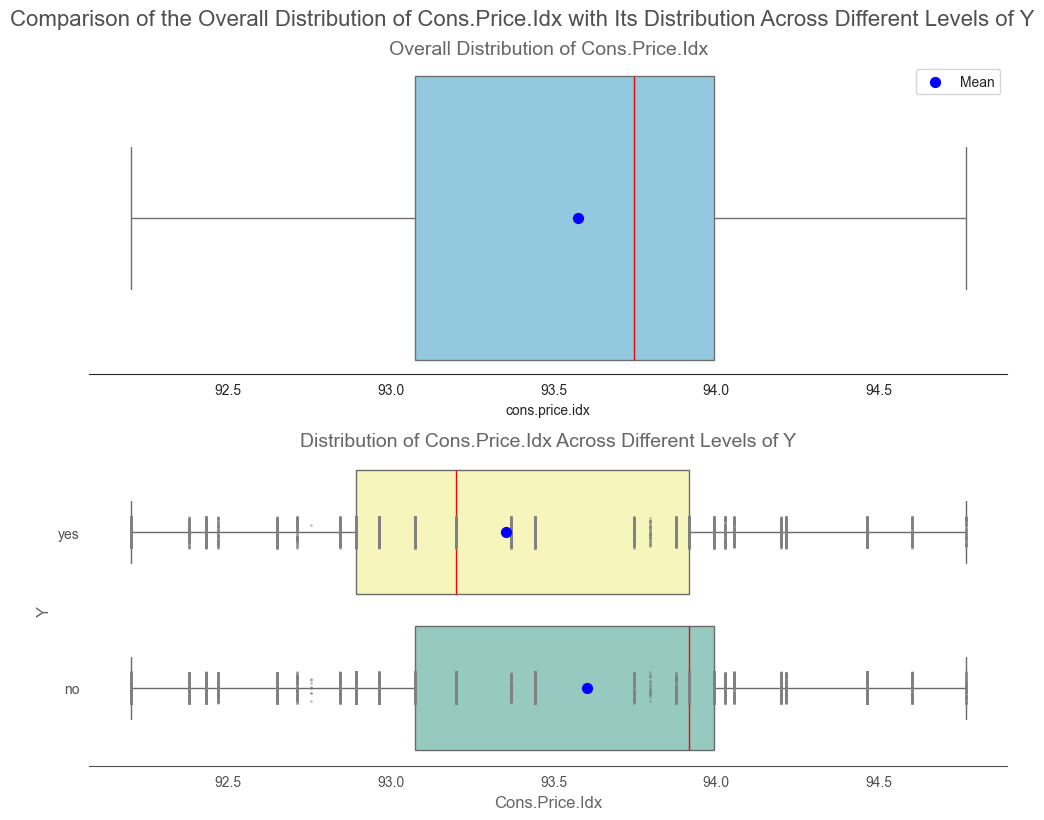

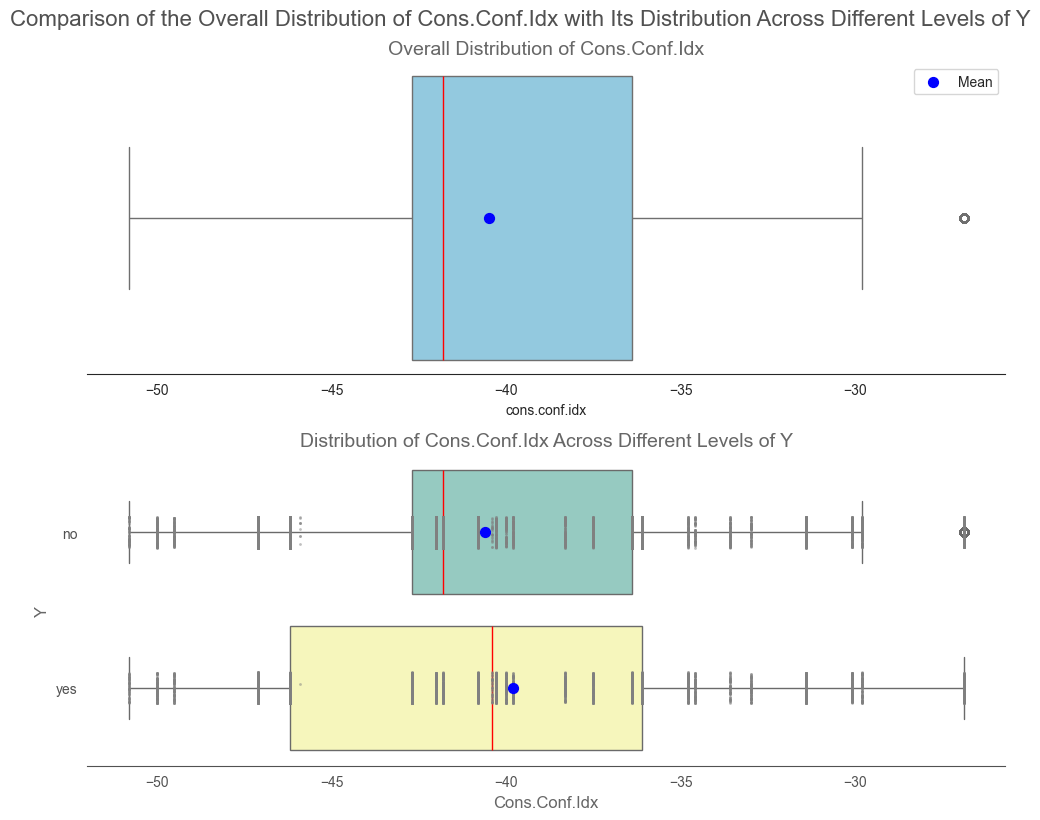

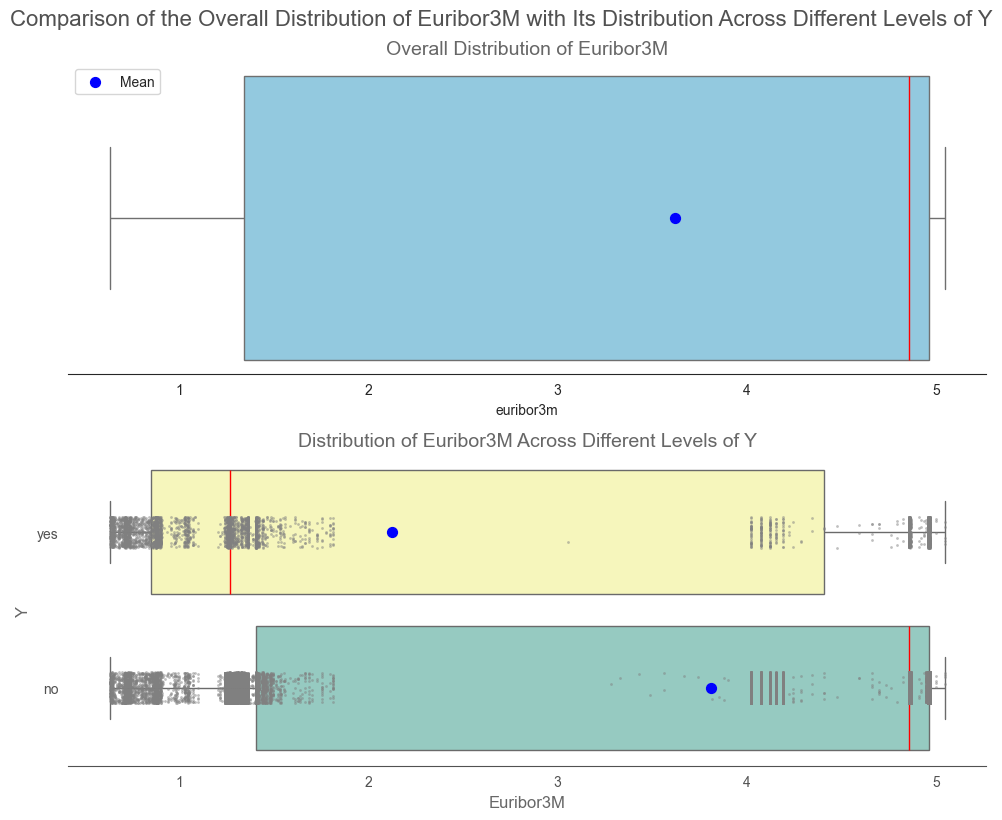

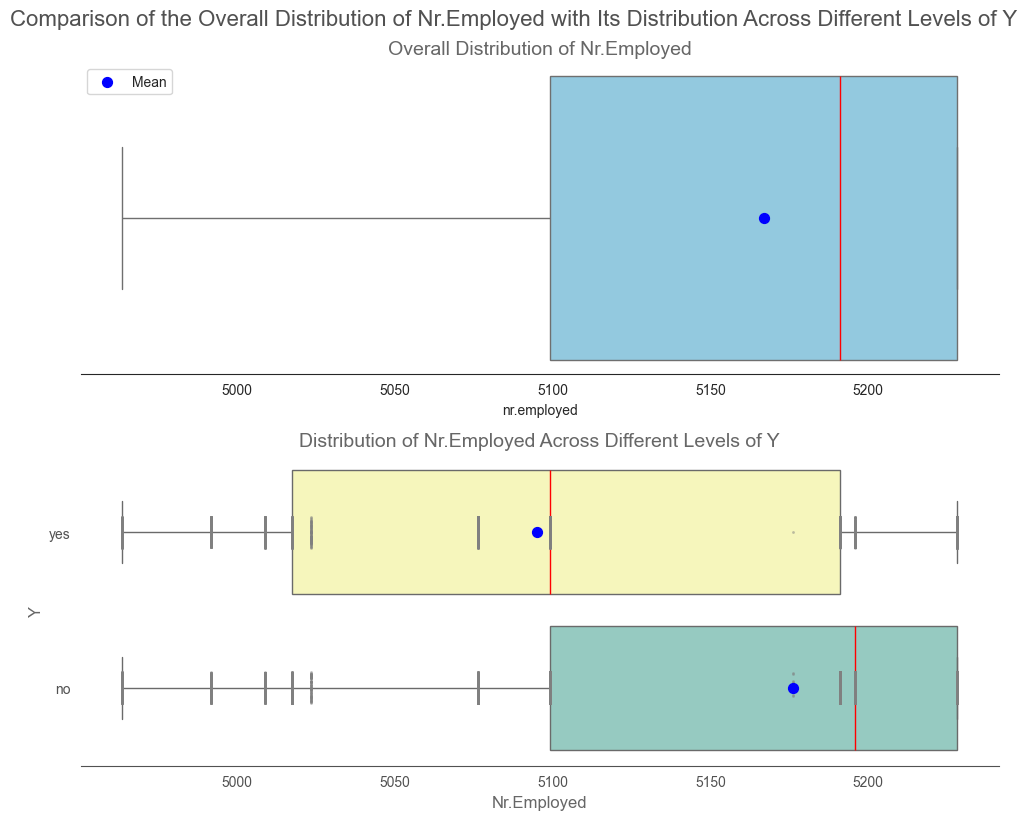

In [20]:
def plot_distribution(data, feature, target):
    sns.set_style('white')
    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(2, 1)
    
    # Overall distribution of the feature
    ax1 = fig.add_subplot(gs[0])
    sns.boxplot(data=data, x=feature, ax=ax1, color='skyblue',
                medianprops={'color': 'red'})
    # ax1.set_axis_off()
    ax1.set_title(f'Overall Distribution of {feature.title()}', fontsize=14, alpha=0.7)
    mean = data[feature].mean()
    ax1.scatter(mean, 0, color='blue', s=50, zorder=5, label='Mean')
    ax1.legend()

    # Distribution of the feature across different levels of the target variable
    ax2 = fig.add_subplot(gs[1])
    ordered = data.groupby(target)[feature].median().sort_values().index
    sns.boxplot(data=data, y=target, x=feature, ax=ax2, order=ordered, hue=target, palette='Set3', 
                  legend=False,
                  medianprops={'color': 'red'})
    
    # Overlay mean points
    means = data.groupby(target)[feature].mean().reindex(ordered)
    for idx, mean in enumerate(means):
        ax2.scatter(mean, idx, color='blue', s=50, zorder=5, label='Mean' if idx == 0 else "")
    
    # Overlay data points
    sns.stripplot(data=data, y=target, x=feature, ax=ax2, order=ordered, 
                  size=2, color='gray', alpha=0.5, jitter=True)
    
    # Adding labels and title
    ax2.set_ylabel(f'{target.title()}', fontsize=12, alpha=0.7)
    ax2.set_xlabel(f'{feature.title()}', fontsize=12, alpha=0.7)
    ax2.set_title(f'Distribution of {feature.title()} Across Different Levels of {target.title()}',
                  fontsize=14, alpha=0.7)
    ax2.get_legend().set_visible(False)
    # Remove unnecessary spines
    sns.despine(left=True, right=True, top=True, bottom=False)
    for spine in ax2.spines.values():
        spine.set_alpha(0.8)
    plt.xticks(alpha=0.8)
    plt.yticks(alpha=0.8)
    plt.tight_layout()
    
    # Adding the main title
    plt.suptitle(f'Comparison of the Overall Distribution of {feature.title()} with '
                 f'Its Distribution Across Different Levels of {target.title()}',
                 fontsize=16, y=1.02, alpha=0.8)
    
    plt.show()


for feature in continuous_features:
    plot_distribution(data=df, feature=feature, target='y')

## Insights and Summary

### Data Quality Plan

| Feature   | Data Quality issue     | Potential Handling Strategies |
|:---------:|:----------------------:|:-----------------------------:|
| default   | Missing values (20.9%) | Missing values treated as another category (unknown) |
| education | Missing values (4.2%)  | Missing values treated as another category (unknown) |
| housing   | Missing values (2.4%)  | Missing values treated as another category (unknown) |
| loan      | Missing values (2.4%)  | Missing values treated as another category (unknown) |
| job       | Missing values (0.8%)  | Missing values treated as another category (unknown) |
| marital   | Missing values (0.2%)  | Missing values treated as another category (unknown) |
| age       | Outliers (High)        | Binning                                              |
| duration  | Outliers (High)        | Binning                                              |
| campaign  | Outliers (High)        | Binning                                              |
| pdays     | Outliers (High)        | Binning                                              |
| previous  | Outliers (High)        | Binning                                              |

### Initial Data Insights

**Feature Importance:**  
Categorical variables such as `job`, `marital`, `education`, `contact`, `month`, and `poutcome` exhibit significant variations in relation to the target variable `y`. This suggests their potential importance as features in a predictive model.

Continuous variables such as `duration`, `campaign`, `previous`, `emp.var.rate`, `cons.conf.idx`, `euribor3m`, and `nr.employed` also show relationships with the target `y`.

**Correlation Among Categorical Features:**  
The custom function `categorical_levels_corr()` reveals significant relationships between the levels of categorical features. A threshold of 3.99 has been chosen to determine the significance of these correlations. The choice of threshold value influences the identification of significant relationships: a lower threshold will result in more levels of different features showing relationships, while a higher threshold will identify fewer correlations. You can experiment with different threshold values to explore these relationships further.